In [1]:
import PythonicDISORT
import scipy as sc
import plotly as pl
import autograd as ag
import autograd.numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from numpy.polynomial.legendre import Legendre
from PythonicDISORT.subroutines import atleast_2d_append
from math import pi

# Matplotlib default colors
colors = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

# Table of Contents
* [Load dataset](#Load-dataset)
* [Parameters and setup](#Parameters-and-setup)
	* [Figure 2](#Figure-2)
* [Exact coupling coefficients](#Exact-coupling-coefficients)
	* [Figure 1](#Figure-1)
* [Baseline two-stream closures](#Baseline-two-stream-closures)
	* [Figure 4](#Figure-4)
	* [Figure 9](#Figure-9)
* [Numerical Optimization (for one set of problem parameters)](#Numerical-Optimization-%28for-one-set-of-problem-parameters%29)
	* [Figure 5](#Figure-5)
* [Contour and 3D plots of dataset](#Contour-and-3D-plots-of-dataset)
	* [Figure 6](#Figure-6)
		* [Figure 6 but as an INTERACTIVE 3D plot](#Figure-6-but-as-an-INTERACTIVE-3D-plot)
	* [Figure 7](#Figure-7)
		* [Figure 7 but as an INTERACTIVE 3D plot](#Figure-7-but-as-an-INTERACTIVE-3D-plot)
* [Diffusion Approximation](#Diffusion-Approximation)
	* [Figure 8](#Figure-8)
	* [Figure 10](#Figure-10)
		* [Figure 10 but as an INTERACTIVE 3D plot](#Figure-10-but-as-an-INTERACTIVE-3D-plot)


Figure 3 is excluded because it is a diagram and does not involve data.

# Load dataset

In [2]:
data = np.load("twostreams_revisited_data.npz")

(  # Inputs
    g_data,
    tau0_data,
    omega_data,
    mu0_data,
    Cloud_Leg_coeffs,
    omega_cloud_data,
    # Reflectance
    R_true_data,
    R_opt2_data,
    R_opt4_data,
    R_Zdun_data,
    R_Edd_data,
    R_CC1_data,
    R_true_cloud_data,
    R_HGopt2_cloud_data,
    R_HGopt4_cloud_data,
    R_Zdun_cloud_data,
    R_Edd_cloud_data,
    R_CC1_cloud_data,
    # Transmittance
    T_true_data,
    T_opt2_data,
    T_opt4_data,
    T_Zdun_data,
    T_Edd_data,
    T_CC1_data,
    T_true_cloud_data,
    T_HGopt2_cloud_data,
    T_HGopt4_cloud_data,
    T_Zdun_cloud_data,
    T_Edd_cloud_data,
    T_CC1_cloud_data,
    # Optimized gammas
    gamma1_opt_data,
    gamma2_opt_data,
    gamma1p_opt_data,
    gamma1m_opt_data,
    gamma2p_opt_data,
    gamma2m_opt_data,
    gamma1_opt_cloudbutHGomega_data,
    gamma2_opt_cloudbutHGomega_data,
    gamma1p_opt_cloudbutHGomega_data,
    gamma1m_opt_cloudbutHGomega_data,
    gamma2p_opt_cloudbutHGomega_data,
    gamma2m_opt_cloudbutHGomega_data,
) = (values for values in data.values())

# Parameters and setup

Should realistic cloud phase functions and single-scattering albedos be used instead?

In [3]:
use_cloud = False

**Choose problem parameters**

In [4]:
g = np.random.choice(g_data)
tau0 = np.random.choice(tau0_data)
omega = np.random.choice(omega_data)
mu0 = np.random.choice(mu0_data)

if use_cloud:
    g_index = np.random.randint(6)
    g = Cloud_Leg_coeffs[g_index, 1]
    omega = omega_cloud_data[g_index]

print(g, tau0, omega, mu0)

0.8200000000000001 0.019306977288832516 0.9993690426555198 0.9915532907378721


## Figure 2

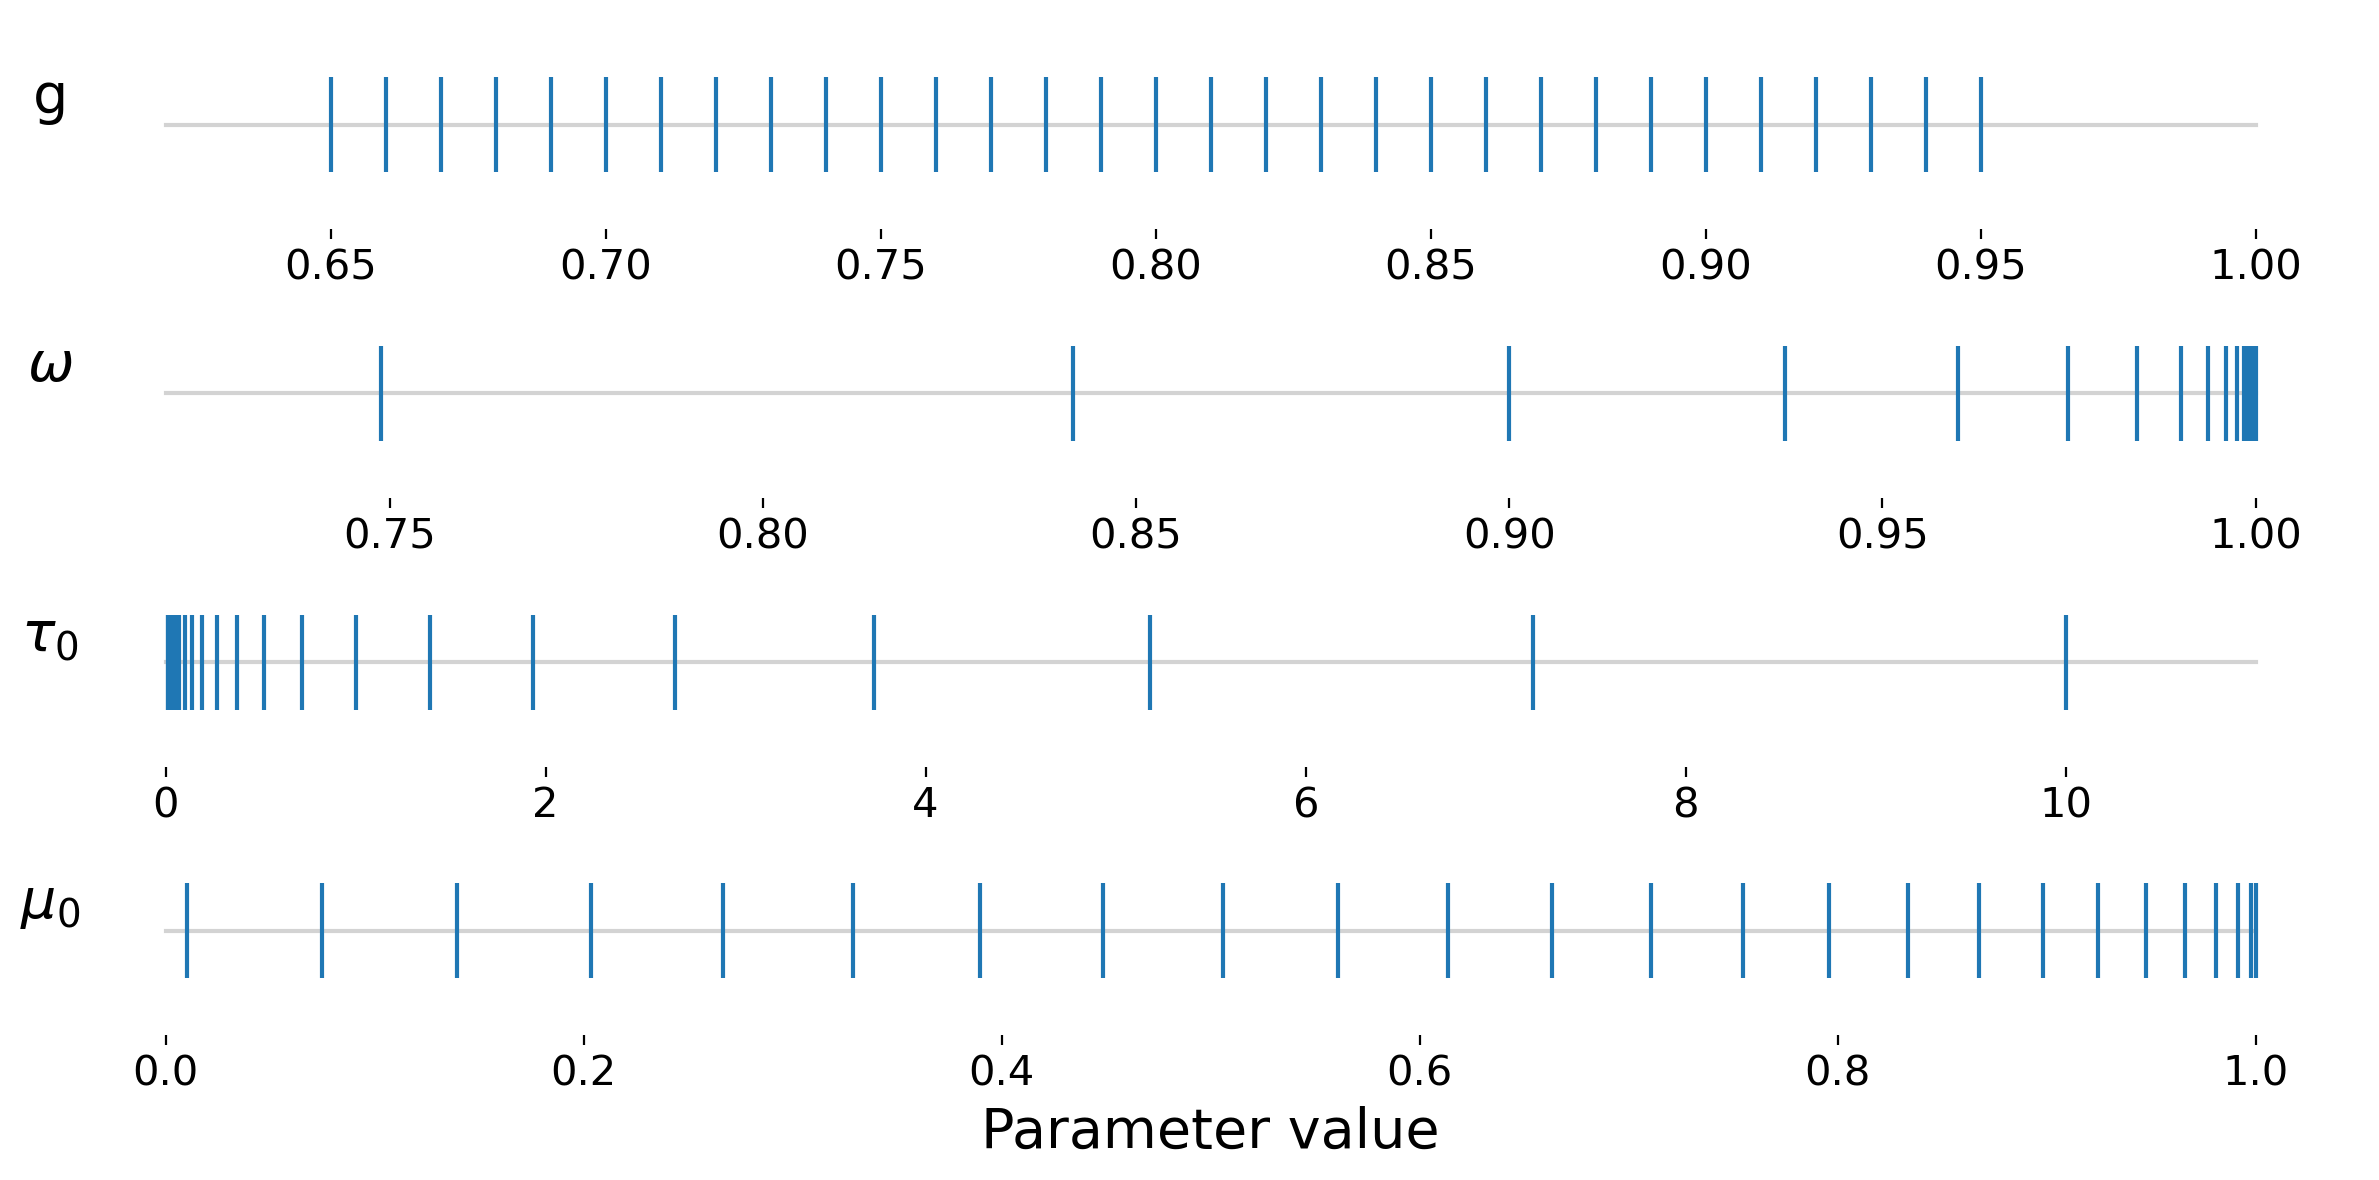

In [5]:
# Plot problem paramaters (Fig. 2)
fig = plt.figure(figsize=(12, 6), dpi=200)
ax1 = plt.subplot(411)
plt.plot([0.62, 1], np.ones(2), color="lightgrey")
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_yaxis().set_ticks([])
plt.eventplot(g_data, orientation='horizontal')
plt.xticks(fontsize=15)
plt.ylabel("g", fontsize=20, rotation=0)
ax1.tick_params(labelleft=False)
ax2 = plt.subplot(412)
plt.plot([0.72, 1], np.ones(2), color="lightgrey")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.get_yaxis().set_ticks([])
plt.eventplot(omega_data, orientation='horizontal')
plt.xticks(fontsize=15)
plt.ylabel(r"$\omega$", fontsize=20, rotation=0)
ax2.tick_params(labelleft=False)
ax3 = plt.subplot(413)
plt.plot([0, 11], np.ones(2), color="lightgrey")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)
ax3.get_yaxis().set_ticks([])
plt.eventplot(tau0_data, orientation='horizontal')
plt.xticks(fontsize=15)
plt.ylabel(r"$\tau_0$", fontsize=20, rotation=0)
ax3.tick_params(labelleft=False)
ax4 = plt.subplot(414)
plt.plot([0, 1], np.ones(2), color="lightgrey")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax4.get_yaxis().set_ticks([])
plt.eventplot(mu0_data, orientation='horizontal')
plt.xticks(fontsize=15)
plt.ylabel(r"$\mu_0$", fontsize=20, rotation=0)
plt.xlabel("Parameter value", fontsize=20)
ax4.tick_params(labelleft=False)

fig.tight_layout(h_pad=0)

**Choose computational parameters**

In [6]:
if use_cloud:
    NQuad = 499 * 2 # Should choose prime number X 2
else:
    NQuad = 146 # Should choose prime number X 2
NLeg = NQuad

Ntau = 200  # Number of tau test points, mostly for plotting
tau_arr = np.linspace(0, tau0, Ntau)

In [7]:
# Call high resolution solver
if use_cloud:
    Leg_coeffs_all = Cloud_Leg_coeffs[g_index, :] # Realistic cloud phase function Legendre coefficients
else:
    Leg_coeffs_all = g ** np.arange(250) # Henyey-Greenstein phase function Legendre coefficients
I0 = 1 / mu0

flux_up, flux_down, u0 = PythonicDISORT.pydisort(
    tau0,
    omega,
    NQuad,
    Leg_coeffs_all,
    mu0,
    I0,
    0,
    only_flux=True,
    _autograd_compatible=True,
)[1:]

N = NQuad // 2
mu_arr_pos, weights_mu = PythonicDISORT.subroutines.Gauss_Legendre_quad(N)

In [8]:
# Compute backscattering ratio beta0
def S(Leg_coeffs):
    NLeg = len(Leg_coeffs)
    ell = np.arange(1, NLeg, 2, dtype="int64")
    t_ell = (-1) ** ((ell - 1) / 2) * (
        sc.special.factorial2(ell, exact=True)
        / (sc.special.factorial2(ell - 1, exact=True) * ell * (ell + 1))
    )
    coeffs = np.zeros(NLeg)
    coeffs[ell] = (2 * ell + 1) * t_ell * Leg_coeffs[ell]
    return Legendre(coeffs)


beta = lambda mu0: (1 / 2) * (
    1 + S(Leg_coeffs_all)(-mu0)
)  # Backscattering ratio function
beta0 = beta(mu0)
print("beta0 =", beta0)

beta0 = 0.04518357000920603


**Formula (12) to compute fluxes and consequently reflectance and transmittance (and absorption)**

In [9]:
# Formula (12) to compute fluxes
def gen_constcoeffs_diffusefluxes(
    g1p, g1m, g2p, g2m, g3, incident_flux, omega, tau0, mu0, g4=None
):
    if g4 == None:
        g4 = 1 - g3
    
    k = np.sqrt(g1p**2 + 2 * g1p * g1m + g1m**2 - 4 * g2p * g2m + 0j)
    lp = (g1p - g1m + k) / 2
    lm = (g1p - g1m - k) / 2
    a1 = 2 * g2m * ((g1p * g4 + g2p * g3) * mu0 + g4)
    a2 = 2 * g2p * ((g1m * g3 + g2m * g4) * mu0 - g3)
    a3 = g1p + g1m + k
    a4 = g1p + g1m - k
    a5 = (g1m * g3 + g2m * g4) * mu0 - g3
    a6 = (g1p * g4 + g2p * g3) * mu0 + g4
    a7 = (g1p * g1m - g2p * g2m) * mu0**2 + (g1m - g1p) * mu0 - 1
    #print(lp, lm)

    if np.real(lp) >= 0 and np.real(lm) >= 0:
        denom = a7 * (a3 * np.exp(-lm * tau0) - a4 * np.exp(-lp * tau0))
        if np.abs(denom) < 1e-15:
            denom_reciprocal = 0
        else:
            denom_reciprocal = 1 / denom
        Fp = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a1 * (np.exp(lp * (tau - tau0)) - np.exp(lm * (tau - tau0)))
                - a5
                * (
                    a3
                    * (
                        np.exp(lp * (tau - tau0) - tau0 / mu0 - lm * tau0)
                        - np.exp(-tau / mu0 - lm * tau0)
                    )
                    - a4
                    * (
                        np.exp(lm * (tau - tau0) - tau0 / mu0 - lp * tau0)
                        - np.exp(-tau / mu0 - lp * tau0)
                    )
                )
            )
            * denom_reciprocal
        )
        Fm = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a2
                * (
                    np.exp(lm * (tau - tau0) - tau0 / mu0 - lp * tau0)
                    - np.exp(lp * (tau - tau0) - tau0 / mu0 - lm * tau0)
                )
                + a6
                * (
                    a3 * (np.exp(-tau / mu0 - lm * tau0) - np.exp(lm * (tau - tau0)))
                    - a4 * (np.exp(-tau / mu0 - lp * tau0) - np.exp(lp * (tau - tau0)))
                )
            )
            * denom_reciprocal
        )

    elif np.real(lp) >= 0 and np.real(lm) <= 0:
        denom = a7 * (a3 - a4 * np.exp(-k * tau0))  # lm - lp = -k
        if np.abs(denom) < 1e-15:
            denom_reciprocal = 0
        else:
            denom_reciprocal = 1 / denom
        Fp = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a1 * (np.exp(lp * tau - k * tau0) - np.exp(lm * tau))
                - a5
                * (
                    a3 * (np.exp(lp * (tau - tau0) - tau0 / mu0) - np.exp(-tau / mu0))
                    - a4
                    * (
                        np.exp(lm * tau - tau0 / mu0 - lp * tau0)
                        - np.exp(-k * tau0 - tau / mu0)
                    )
                )
            )
            * denom_reciprocal
        )
        Fm = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a2
                * (
                    np.exp(lm * tau - tau0 / mu0 - lp * tau0)
                    - np.exp(lp * (tau - tau0) - tau0 / mu0)
                )
                + a6
                * (
                    a3 * (np.exp(-tau / mu0) - np.exp(lm * tau))
                    - a4 * (np.exp(-k * tau0 - tau / mu0) - np.exp(lp * tau - k * tau0))
                )
            )
            * denom_reciprocal
        )

    elif np.real(lp) <= 0 and np.real(lm) >= 0:
        denom = a7 * (a3 * np.exp(k * tau0) - a4)  # lp - lm = k
        if np.abs(denom) < 1e-15:
            denom_reciprocal = 0
        else:
            denom_reciprocal = 1 / denom
        Fp = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a1 * (np.exp(lp * tau) - np.exp(k * tau0 + lm * tau))
                - a5
                * (
                    a3
                    * (
                        np.exp(lp * tau - tau0 / mu0 - lm * tau0)
                        - np.exp(k * tau0 - tau / mu0)
                    )
                    - a4 * (np.exp(lm * (tau - tau0) - tau0 / mu0) - np.exp(-tau / mu0))
                )
            )
            * denom_reciprocal
        )
        Fm = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a2
                * (
                    np.exp(lm * (tau - tau0) - tau0 / mu0)
                    - np.exp(lp * tau - tau0 / mu0 - lm * tau0)
                )
                + a6
                * (
                    a3 * (np.exp(k * tau0 - tau / mu0) - np.exp(k * tau0 + lm * tau))
                    - a4 * (np.exp(-tau / mu0) - np.exp(lp * tau))
                )
            )
            * denom_reciprocal
        )

    else:
        denom = a7 * (a3 * np.exp(lp * tau0) - a4 * np.exp(lm * tau0))
        if np.abs(denom) < 1e-15:
            denom_reciprocal = 0
        else:
            denom_reciprocal = 1 / denom
        Fp = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a1 * (np.exp(lp * tau + lm * tau0) - np.exp(lp * tau0 + lm * tau))
                - a5
                * (
                    a3
                    * (
                        np.exp((lp * mu0 * tau - tau0) / mu0)
                        - np.exp((lp * mu0 * tau0 - tau) / mu0)
                    )
                    - a4
                    * (
                        np.exp((lm * mu0 * tau - tau0) / mu0)
                        - np.exp((lm * mu0 * tau0 - tau) / mu0)
                    )
                )
            )
            * denom_reciprocal
        )
        Fm = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a2
                * (
                    np.exp((lm * mu0 * tau - tau0) / mu0)
                    - np.exp((lp * mu0 * tau - tau0) / mu0)
                )
                + a6
                * (
                    a3
                    * (
                        np.exp((lp * mu0 * tau0 - tau) / mu0)
                        - np.exp(lp * tau0 + lm * tau)
                    )
                    - a4
                    * (
                        np.exp((lm * mu0 * tau0 - tau) / mu0)
                        - np.exp(lp * tau + lm * tau0)
                    )
                )
            )
            * denom_reciprocal
        )
        
    return Fp, Fm

In [10]:
# Function to compute R, T (and A)
def RTA_constcoeffs_diffusefluxes(g1p, g1m, g2p, g2m, g3, omega, tau0, mu0, g4=None):
    if g4 == None:
        g4 = 1 - g3

    Fp, Fm = gen_constcoeffs_diffusefluxes(
        g1p, g1m, g2p, g2m, g3, 1, omega, tau0, mu0, g4
    )

    R = Fp(0)
    T = Fm(tau0)
    A = 1 - R - T
    return R, T, A

# Exact coupling coefficients

In [11]:
# Implement exact coupling coefficients
S_cache = S(Leg_coeffs_all)(mu_arr_pos)

D1p = (
    lambda tau: (2 * pi)
    * (1 - omega / 2 * (1 + S_cache))
    * weights_mu
    @ atleast_2d_append(u0(tau))[:N, :]
)
D2m = (
    lambda tau: (2 * pi)
    * (omega / 2)
    * (1 - S_cache)
    * weights_mu
    @ atleast_2d_append(u0(tau))[N:, :]
)
D2p = (
    lambda tau: (2 * pi)
    * (omega / 2)
    * (1 - S_cache)
    * weights_mu
    @ atleast_2d_append(u0(tau))[:N, :]
)
D1m = (
    lambda tau: (2 * pi)
    * (1 - omega / 2 * (1 + S_cache))
    * weights_mu
    @ atleast_2d_append(u0(tau))[N:, :]
)


def gamma1p(tau):
    tau = np.atleast_1d(tau)
    Fp = flux_up(tau)
    return np.squeeze(
        np.divide(
            D1p(tau),
            Fp,
            out=np.zeros_like(tau, dtype=np.float64),
            where=Fp != 0,
            casting="unsafe",
        )
    )[()]


def gamma1m(tau):
    tau = np.atleast_1d(tau)
    Fm = flux_down(tau)[0]
    return np.squeeze(
        np.divide(
            D1m(tau),
            Fm,
            out=np.zeros_like(tau, dtype=np.float64),
            where=Fm != 0,
            casting="unsafe",
        )
    )[()]


def gamma2p(tau):
    tau = np.atleast_1d(tau)
    Fp = flux_up(tau)
    return np.squeeze(
        np.divide(
            D2p(tau),
            Fp,
            out=np.zeros_like(tau, dtype=np.float64),
            where=Fp != 0,
            casting="unsafe",
        )
    )[()]


def gamma2m(tau):
    tau = np.atleast_1d(tau)
    Fm = flux_down(tau)[0]
    return np.squeeze(
        np.divide(
            D2m(tau),
            Fm,
            out=np.zeros_like(tau, dtype=np.float64),
            where=Fm != 0,
            casting="unsafe",
        )
    )[()]


def gamma1(tau):
    tau = np.atleast_1d(tau)
    Fm = flux_down(tau)[0]
    Fp = flux_up(tau)
    denom = (Fp - Fm) * (Fp + Fm)
    return np.squeeze(
        np.divide(
            Fp * (D1p(tau) - D2m(tau)) + Fm * (D2p(tau) - D1m(tau)),
            denom,
            out=np.zeros_like(tau, dtype=np.float64),
            where=np.abs(denom) != 0,
            casting="unsafe",
        )
    )[()]


def gamma2(tau):
    tau = np.atleast_1d(tau)
    Fm = flux_down(tau)[0]
    Fp = flux_up(tau)
    denom = (Fp - Fm) * (Fp + Fm)
    return np.squeeze(
        np.divide(
            Fm * (D1p(tau) - D2m(tau)) + Fp * (D2p(tau) - D1m(tau)),
            denom,
            out=np.zeros_like(tau, dtype=np.float64),
            where=np.abs(denom) != 0,
            casting="unsafe",
        )
    )[()]

**Verify exact coupling coefficients**

In [12]:
# Verify exact general two-stream equations
'''def RHS_exact(tau, F):
    plus = (
        gamma1p(tau) * F[0, :]
        - gamma2m(tau) * F[1, :]
        - omega * I0 * beta0 * np.exp(-tau / mu0)
    )
    minus = (
        gamma2p(tau) * F[0, :]
        - gamma1m(tau) * F[1, :]
        + omega * I0 * (1 - beta0) * np.exp(-tau / mu0)
    )
    return np.vstack((plus, minus))


sol_exact = sc.integrate.solve_bvp(
    RHS_exact,
    lambda ya, yb: np.array([ya[-1], yb[0]]),
    tau_arr,
    np.zeros((2, Ntau)),
    tol=1e-5,
    max_nodes=int(1e4),
    verbose=2,
)

print()
print(
    "Down flux max pointwise error =",
    np.max(np.abs(flux_up(tau_arr)[:-1] - sol_exact.sol(tau_arr)[0, :-1])),
)
print(
    "Up flux max pointwise error =",
    np.max(np.abs(flux_down(tau_arr)[0][:-1] - sol_exact.sol(tau_arr)[1, :-1])),
)
'''

'def RHS_exact(tau, F):\n    plus = (\n        gamma1p(tau) * F[0, :]\n        - gamma2m(tau) * F[1, :]\n        - omega * I0 * beta0 * np.exp(-tau / mu0)\n    )\n    minus = (\n        gamma2p(tau) * F[0, :]\n        - gamma1m(tau) * F[1, :]\n        + omega * I0 * (1 - beta0) * np.exp(-tau / mu0)\n    )\n    return np.vstack((plus, minus))\n\n\nsol_exact = sc.integrate.solve_bvp(\n    RHS_exact,\n    lambda ya, yb: np.array([ya[-1], yb[0]]),\n    tau_arr,\n    np.zeros((2, Ntau)),\n    tol=1e-5,\n    max_nodes=int(1e4),\n    verbose=2,\n)\n\nprint()\nprint(\n    "Down flux max pointwise error =",\n    np.max(np.abs(flux_up(tau_arr)[:-1] - sol_exact.sol(tau_arr)[0, :-1])),\n)\nprint(\n    "Up flux max pointwise error =",\n    np.max(np.abs(flux_down(tau_arr)[0][:-1] - sol_exact.sol(tau_arr)[1, :-1])),\n)\n'

In [13]:
# Verify exact symmetric two-stream equations (decrease `tol` if this does not converge)
'''def RHS_exact(tau, F):
    plus = (
        gamma1(tau) * F[0, :]
        - gamma2(tau) * F[1, :]
        - omega * I0 * beta0 * np.exp(-tau / mu0)
    )
    minus = (
        gamma2(tau) * F[0, :]
        - gamma1(tau) * F[1, :]
        + omega * I0 * (1 - beta0) * np.exp(-tau / mu0)
    )
    return np.vstack((plus, minus))


sol_exact = sc.integrate.solve_bvp(
    RHS_exact,
    lambda ya, yb: np.array([ya[-1], yb[0]]),
    tau_arr,
    np.zeros((2, Ntau)),
    tol=1e-3,
    max_nodes=int(1e4),
    verbose=2,
)

print()
print(
    "Down flux max pointwise error =",
    np.max(np.abs(flux_up(tau_arr)[:-1] - sol_exact.sol(tau_arr)[0, :-1])),
)
print(
    "Up flux max pointwise error =",
    np.max(np.abs(flux_down(tau_arr)[0][:-1] - sol_exact.sol(tau_arr)[1, :-1])),
)
'''

'def RHS_exact(tau, F):\n    plus = (\n        gamma1(tau) * F[0, :]\n        - gamma2(tau) * F[1, :]\n        - omega * I0 * beta0 * np.exp(-tau / mu0)\n    )\n    minus = (\n        gamma2(tau) * F[0, :]\n        - gamma1(tau) * F[1, :]\n        + omega * I0 * (1 - beta0) * np.exp(-tau / mu0)\n    )\n    return np.vstack((plus, minus))\n\n\nsol_exact = sc.integrate.solve_bvp(\n    RHS_exact,\n    lambda ya, yb: np.array([ya[-1], yb[0]]),\n    tau_arr,\n    np.zeros((2, Ntau)),\n    tol=1e-3,\n    max_nodes=int(1e4),\n    verbose=2,\n)\n\nprint()\nprint(\n    "Down flux max pointwise error =",\n    np.max(np.abs(flux_up(tau_arr)[:-1] - sol_exact.sol(tau_arr)[0, :-1])),\n)\nprint(\n    "Up flux max pointwise error =",\n    np.max(np.abs(flux_down(tau_arr)[0][:-1] - sol_exact.sol(tau_arr)[1, :-1])),\n)\n'

**Plot exact coefficients**

In [14]:
# Analytically continue and compute exact coupling coefficients
gamma1p_tau = gamma1p(tau_arr[:-1])
gamma1p_tau = np.append(
    gamma1p_tau,
    ((2 * pi) * (1 - omega / 2 * (1 + S_cache)) * weights_mu@ ag.jacobian(u0)(tau0)[:N])
    / ag.grad(flux_up)(tau0),
)
gamma1m_tau = gamma1m(tau_arr[1:])
gamma1m_tau = np.insert(
    gamma1m_tau,
    0,
    ((2 * pi) * (1 - omega / 2 * (1 + S_cache)) * weights_mu @ ag.jacobian(u0)(0.0)[N:])
    / ag.grad(lambda tau: flux_down(tau)[0])(0.0),
)
gamma2p_tau = gamma2p(tau_arr[:-1])
gamma2p_tau = np.append(
    gamma2p_tau,
    ((2 * pi) * (omega / 2) * (1 - S_cache) * weights_mu @ ag.jacobian(u0)(tau0)[:N])
    / ag.grad(flux_up)(tau0),
)
gamma2m_tau = gamma2m(tau_arr[1:])
gamma2m_tau = np.insert(
    gamma2m_tau,
    0,
    ((2 * pi) * (omega / 2) * (1 - S_cache) * weights_mu @ ag.jacobian(u0)(0.0)[N:])
    / ag.grad(lambda tau: flux_down(tau)[0])(0.0),
)

gamma1_tau = gamma1(tau_arr)
gamma2_tau = gamma2(tau_arr)

In [15]:
# Compute net flux and discontinuity of symmetric coupling coefficients
F = lambda tau: flux_up(tau) - flux_down(tau)[0]
F_tau = F(tau_arr)
try:
    discontinuity = sc.optimize.root_scalar(
        F,
        bracket=(np.max(tau_arr[F_tau > 0]), np.min(tau_arr[F_tau < 0])),
    ).root
except:
    None

## Figure 1

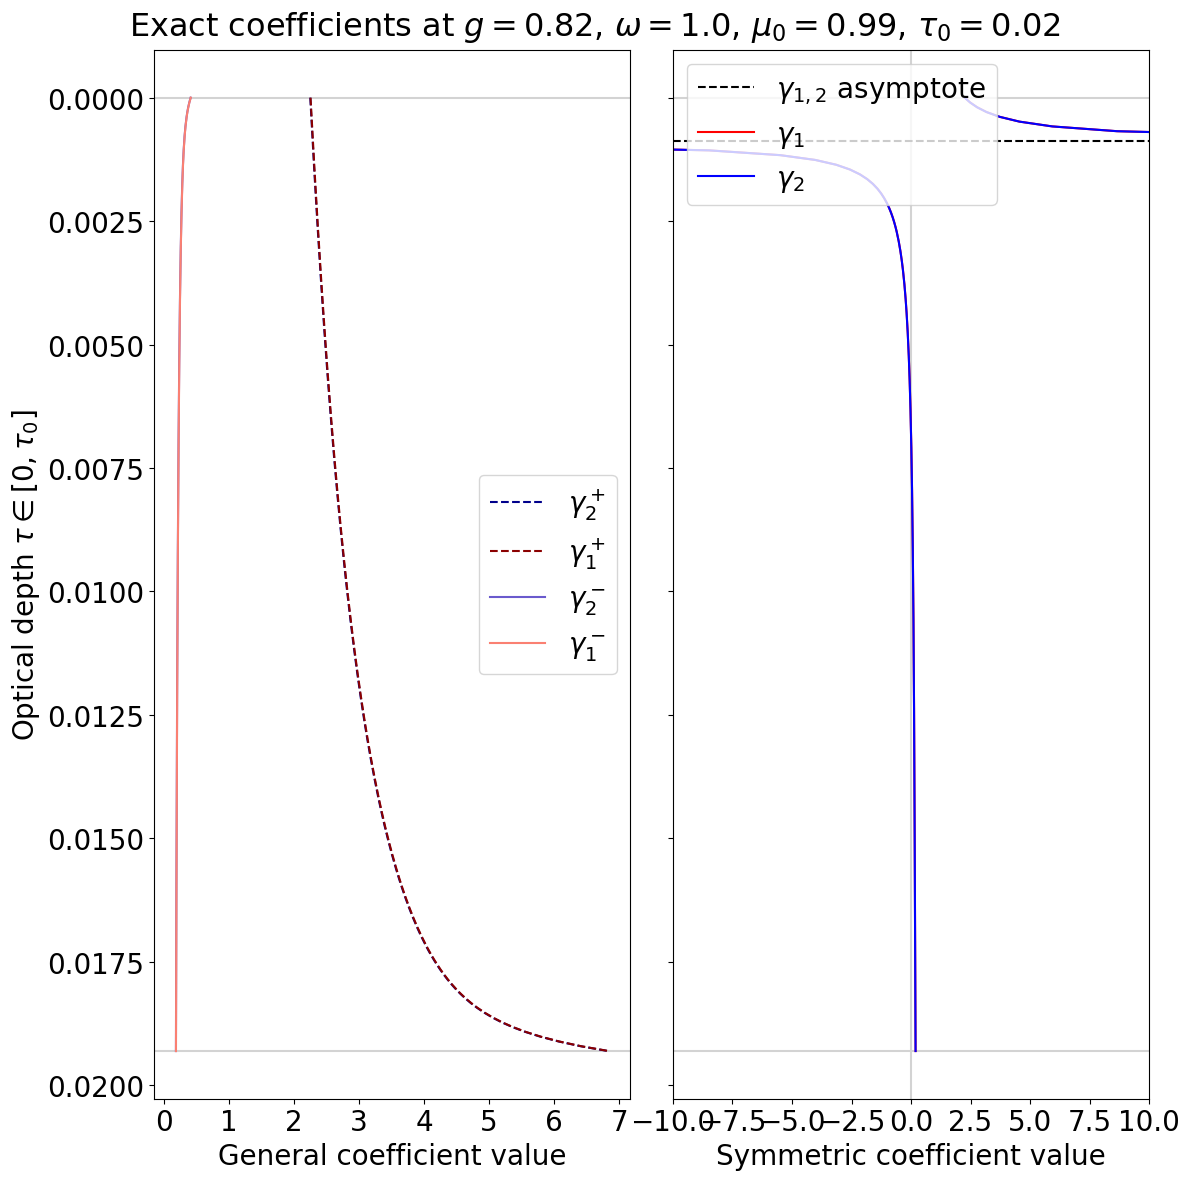

In [16]:
# Plot exact coupling coefficients (Fig. 1)
fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot(121)
plt.suptitle(
    "Exact coefficients at"
    + " $g =$"
    + str(np.round(g, 2))
    + r", $\omega =$"
    + str(np.round(omega, 2))
    + r", $\mu_0 =$"
    + str(np.round(mu0, 2))
    + r", $\tau_0 =$"
    + str(np.round(tau0, 2)),
    fontsize=23,
)
plt.axhline(tau0, color="lightgrey")
plt.axhline(0, color="lightgrey")
plt.plot(gamma2p_tau, tau_arr, '--', label="$\gamma_2^+$", color="darkblue")
plt.plot(gamma1p_tau, tau_arr, '--', label="$\gamma_1^+$", color="darkred")
plt.plot(gamma2m_tau, tau_arr, label="$\gamma_2^-$", color="slateblue")
plt.plot(gamma1m_tau, tau_arr, label="$\gamma_1^-$", color="salmon")
plt.yticks(fontsize=20)
plt.ylabel(r"Optical depth $\tau \in [0, \tau_0]$", fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel("General coefficient value", fontsize=20)
plt.gca().invert_yaxis()
plt.legend(fontsize=20)

ax2 = plt.subplot(122)
plt.axvline(0, color="lightgrey")
plt.axhline(tau0, color="lightgrey")
plt.axhline(0, color="lightgrey")
try:
    plt.axhline(
        discontinuity,
        linestyle='--',
        color="black",
        label="$\gamma_{1,2}$ asymptote",
    )
except:
    None
plt.plot(gamma1_tau[F_tau < 0], tau_arr[F_tau < 0], label="$\gamma_1$", color="red")
plt.plot(gamma2_tau[F_tau < 0], tau_arr[F_tau < 0], label="$\gamma_2$", color="blue")
plt.plot(gamma1_tau[F_tau > 0], tau_arr[F_tau > 0], color="red")
plt.plot(gamma2_tau[F_tau > 0], tau_arr[F_tau > 0], color="blue")
plt.xlim([-10, 10])
plt.gca().invert_yaxis()
plt.xticks(fontsize=20)
plt.xlabel("Symmetric coefficient value", fontsize=20)
ax2.tick_params(labelleft=False)
plt.legend(fontsize=20)
fig.tight_layout(w_pad=0)

# Baseline two-stream closures

In [17]:
# Baseline two-stream closures
# Zdunkowski
def generate_Zdun_gammas(omega, g, mu0):
    g1 = (8 - omega * (5 + 3 * g)) / 4
    g2 = 3 * omega * (1 - g) / 4
    g3 = (2 - 3 * mu0 * g) / 4
    g4 = 1 - g3
    return g1, g2, g3, g4


# Eddington
def generate_Edd_gammas(omega, g, mu0):
    g1 = (7 - omega * (4 + 3 * g)) / 4
    g2 = -(1 - omega * (4 - 3 * g)) / 4
    g3 = (2 - 3 * mu0 * g) / 4
    g4 = 1 - g3
    return g1, g2, g3, g4


# Coakley-Chylek (I)
def generate_CC1_gammas(omega, g, mu0, beta):
    g1 = (1 - omega * (1 - beta(mu0))) / mu0
    g2 = omega * beta(mu0) / mu0
    g3 = beta(mu0)
    g4 = 1 - g3
    return g1, g2, g3, g4

In [18]:
# Delta-Eddington scaling
f = Leg_coeffs_all[2]
g_scaled = (g - f) / (1 - f)
scale_tau = 1 - omega * f
omega_scaled = ((1 - f) / scale_tau) * omega
tau0_scaled = scale_tau * tau0

T_DSreclass = np.exp(-tau0_scaled / mu0) - np.exp (-tau0 / mu0)
Fm_DSreclass = (
    lambda tau: I0 * mu0 * (np.exp(-tau * scale_tau / mu0) - np.exp(-tau / mu0))
)

In [19]:
# Compute coefficients for baseline two-stream methods
(
    gamma1_Zdun,
    gamma2_Zdun,
    gamma3_Zdun,
    gamma4_Zdun,
) = generate_Zdun_gammas(omega_scaled, g_scaled, mu0)

(
    gamma1_Edd,
    gamma2_Edd,
    gamma3_Edd,
    gamma4_Edd,
) = generate_Edd_gammas(omega_scaled, g_scaled, mu0)

(
    gamma1_CC1,
    gamma2_CC1,
    gamma3_CC1,
    gamma4_CC1,
) = generate_CC1_gammas(omega, g, mu0, beta)

In [20]:
# Calculate R, T from baseline methods
R_true = flux_up(0)
T_true = flux_down(tau0)[0]

R_Zdun, T_Zdun, A_Zdun = RTA_constcoeffs_diffusefluxes(
    gamma1_Zdun,
    gamma1_Zdun,
    gamma2_Zdun,
    gamma2_Zdun,
    gamma3_Zdun,
    omega_scaled,
    tau0_scaled,
    mu0,
)
T_Zdun += T_DSreclass

R_Edd, T_Edd, A_Edd = RTA_constcoeffs_diffusefluxes(
    gamma1_Edd,
    gamma1_Edd,
    gamma2_Edd,
    gamma2_Edd,
    gamma3_Edd,
    omega_scaled,
    tau0_scaled,
    mu0,
)
T_Edd += T_DSreclass

R_CC1, T_CC1, A_CC1 = RTA_constcoeffs_diffusefluxes(
    gamma1_CC1,
    gamma1_CC1,
    gamma2_CC1,
    gamma2_CC1,
    gamma3_CC1,
    omega,
    tau0,
    mu0,
)

In [21]:
# Print baseline R, T errors
print("REFLECTANCE")
print("True:", R_true)
print("Zdunkowski:", R_Zdun)
print(
    "( Error =",
    np.abs(R_Zdun - R_true),
    "|",
    "Error ratio = ",
    np.abs(R_Zdun - R_true) / R_true,
    ")",
)
print("Eddington:", R_Edd)
print(
    "( Error =",
    np.abs(R_Edd - R_true),
    "|",
    "Error ratio = ",
    np.abs(R_Edd - R_true) / R_true,
    ")",
)
print("Coakley-Chylek (I):", R_CC1)
print(
    "( Error =",
    np.abs(R_CC1 - R_true),
    "|",
    "Error ratio = ",
    np.abs(R_CC1 - R_true) / R_true,
    ")",
)
print()
print("TRANSMITTANCE")
print("True:", T_true)
print("Zdunkowski:", T_Zdun)
print(
    "( Error =",
    np.abs(T_Zdun - T_true),
    "|",
    "Error ratio = ",
    np.abs(T_Zdun - T_true) / T_true,
    ")",
)
print("Eddington:", T_Edd)
print(
    "( Error =",
    np.abs(T_Edd - T_true),
    "|",
    "Error ratio = ",
    np.abs(T_Edd - T_true) / T_true,
    ")",
)
print("Coakley-Chylek (I):", T_CC1)
print(
    "( Error =",
    np.abs(T_CC1 - T_true),
    "|",
    "Error ratio = ",
    np.abs(T_CC1 - T_true) / T_true,
    ")",
)

REFLECTANCE
True: 0.0008850904139765465
Zdunkowski: 0.0010536533805391066
( Error = 0.00016856296656256016 | Error ratio =  0.1904471722897078 )
Eddington: 0.001053646919899393
( Error = 0.00016855650592284663 | Error ratio =  0.19043987287756697 )
Coakley-Chylek (I): 0.0008784512131378482
( Error = 6.639200838698227e-06 | Error ratio =  0.007501155513445833 )

TRANSMITTANCE
True: 0.018385635896700163
Zdunkowski: 0.01821712532961157
( Error = 0.00016851056708859155 | Error ratio =  0.009165337986424264 )
Eddington: 0.018217131790330486
( Error = 0.00016850410636967683 | Error ratio =  0.009164986586072869 )
Coakley-Chylek (I): 0.018392365952643434
( Error = 6.73005594327078e-06 | Error ratio =  0.00036604966948565996 )


## Figure 4

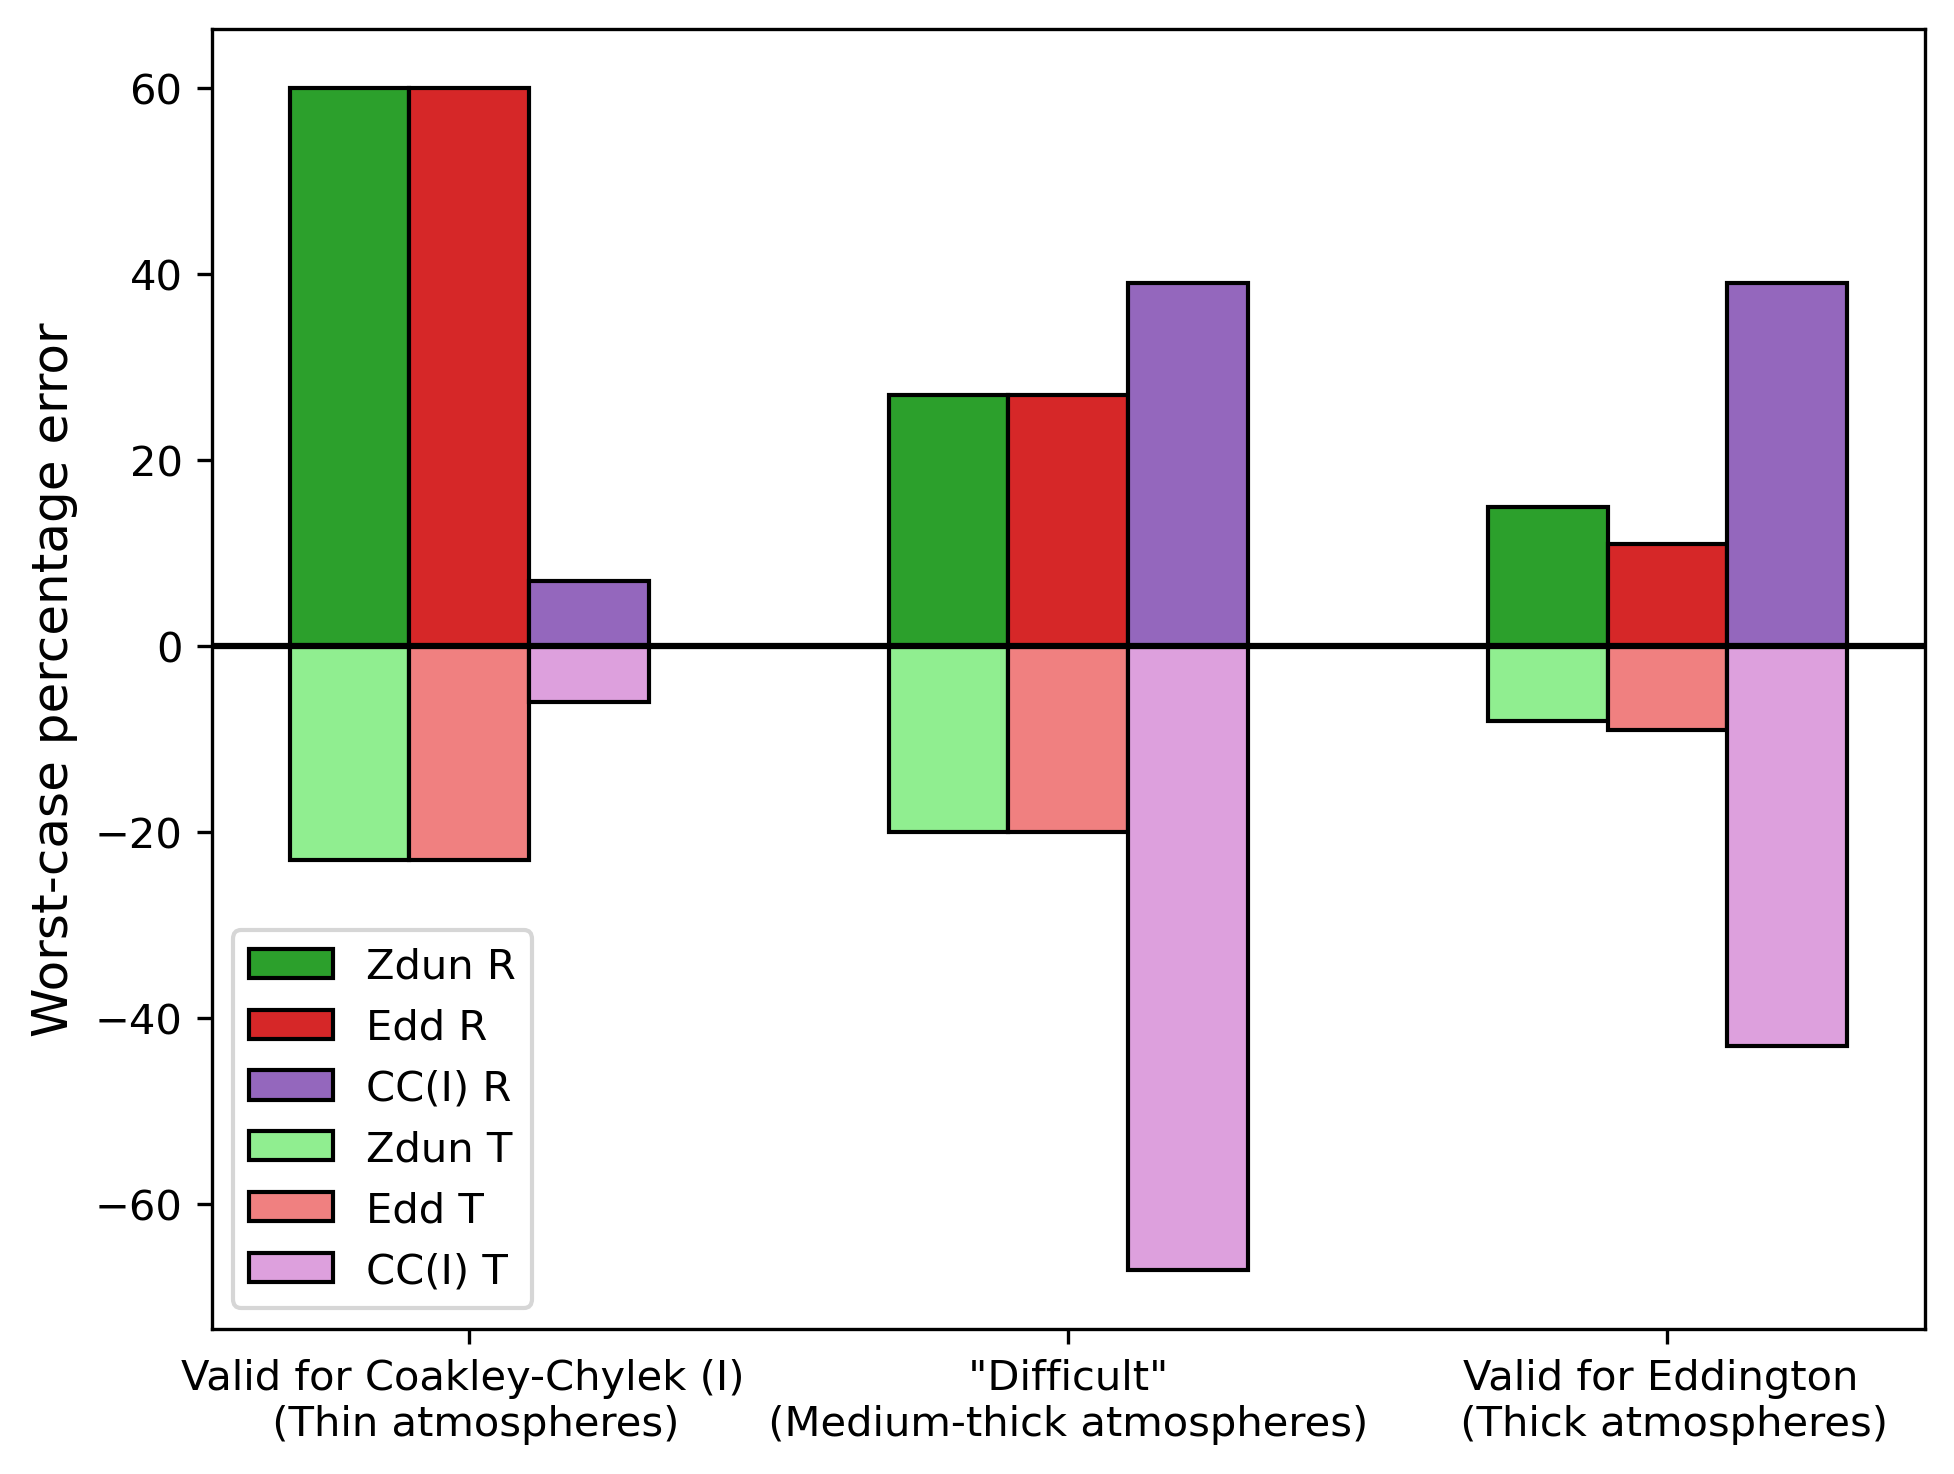

In [22]:
# Baseline two-stream closure errors with respect to Henyey-Greenstein (Fig. 4); data must be manually keyed
baseline_methods = (
    "Valid for Coakley-Chylek (I) \n (Thin atmospheres)",
    """ "Difficult" \n (Medium-thick atmospheres) """,
    "Valid for Eddington \n (Thick atmospheres)",
)
R = {
    "Zdun R": (60, 27, 15),
    "Edd R": (60, 27, 11),
    "CC(I) R": (7, 39, 39),
}

T = {
    "Zdun T": (-23, -20, -8),
    "Edd T": (-23, -20, -9),
    "CC(I) T": (-6, -67, -43),
}

x = np.arange(len(baseline_methods))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout="constrained", dpi=300)

for attribute, measurement in R.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        measurement,
        width,
        label=attribute,
        edgecolor="black",
        color=colors[multiplier + 2],
    )
    multiplier += 1

multiplier = 0
bottom_index = 0
for attribute, measurement in T.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        measurement,
        width,
        label=attribute,
        edgecolor="black",
        color=["lightgreen", "lightcoral", "plum"][multiplier],
    )
    multiplier += 1

ax.set_ylabel("Worst-case percentage error", fontsize=12)
ax.set_xticks(x + width, baseline_methods)
plt.axhline(0, color="black")
plt.legend()

## Figure 9

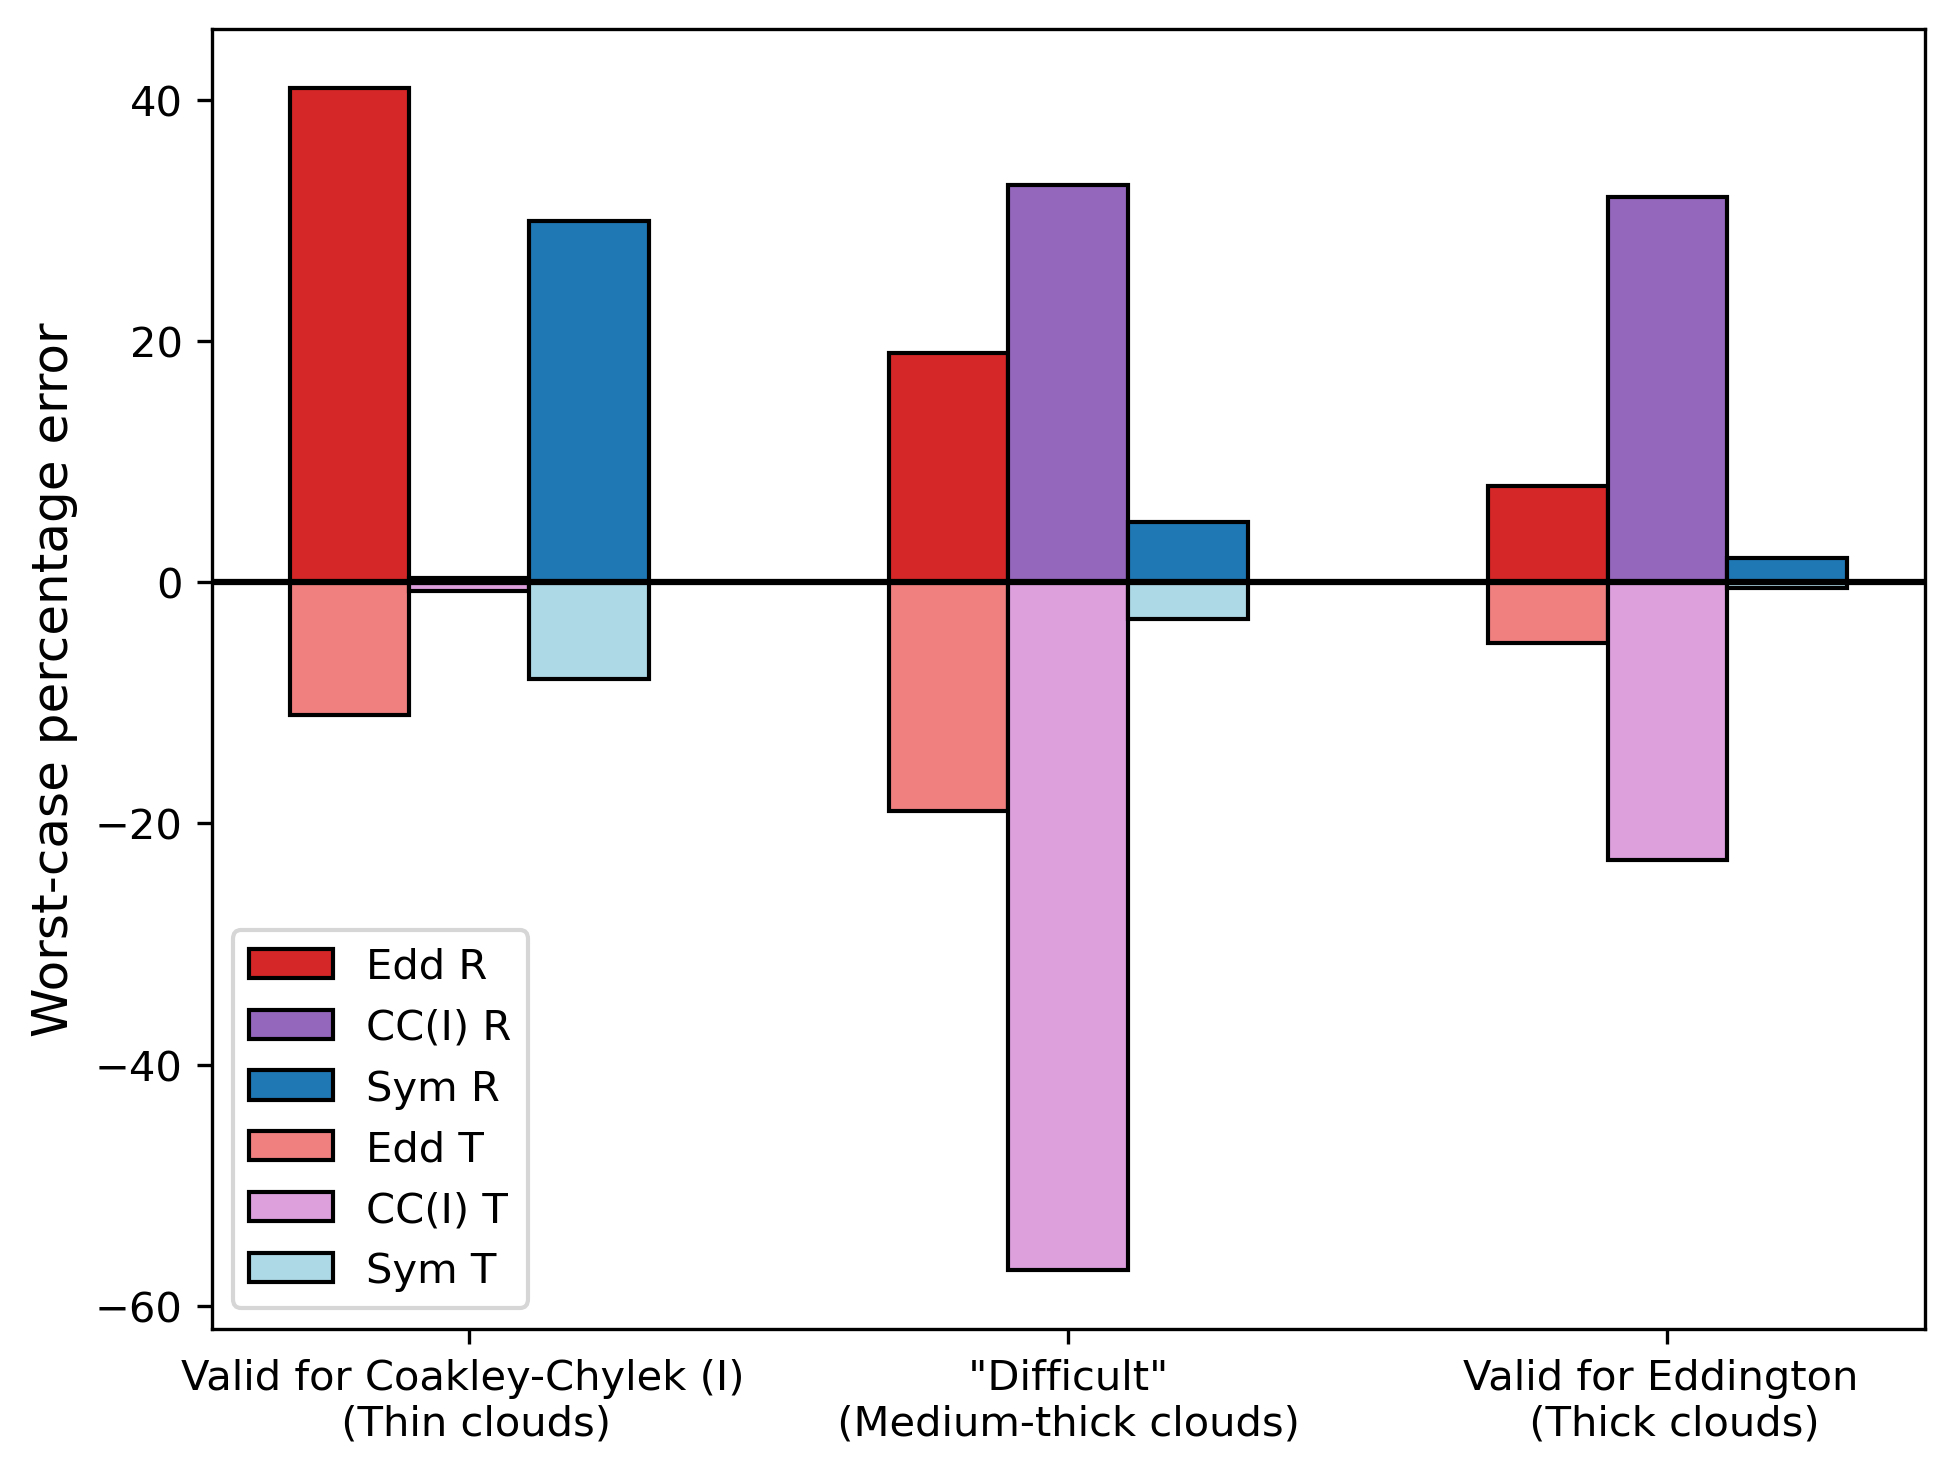

In [23]:
# Two-stream closure errors with respect to a cloud (Fig. 9); data must be manually keyed
baseline_methods = (
    "Valid for Coakley-Chylek (I) \n (Thin clouds)",
    """ "Difficult" \n (Medium-thick clouds) """,
    "Valid for Eddington \n (Thick clouds)",
)
R = {
    "Edd R": (41, 19, 8),
    "CC(I) R": (0.4, 33, 32),
    "Sym R": (30, 5, 2),
}

T = {
    "Edd T": (-11, -19, -5),
    "CC(I) T": (-0.7, -57, -23),
    "Sym T": (-8, -3, -0.5),
    
}

x = np.arange(len(baseline_methods))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0
bar_colors = [colors[3], colors[4], colors[0]]

fig, ax = plt.subplots(layout="constrained", dpi=300)

for attribute, measurement in R.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        measurement,
        width,
        label=attribute,
        edgecolor="black",
        color=bar_colors[multiplier],
    )
    multiplier += 1

multiplier = 0
bottom_index = 0
for attribute, measurement in T.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        measurement,
        width,
        label=attribute,
        edgecolor="black",
        color=["lightcoral", "plum", "lightblue"][multiplier],
    )
    multiplier += 1

ax.set_ylabel("Worst-case percentage error", fontsize=12)
ax.set_xticks(x + width, baseline_methods)
plt.axhline(0, color="black")
plt.legend()

In [24]:
# R, T error over all problem parameters

clip_min = 0

print("Worst case error / error ratios with respect to Henyey-Greenstein")
print("-------------------------------")
print("Coakley-Chylek")
print(
    "Transmittivity:",
    np.max(np.abs((T_CC1_data - T_true_data))),
    "/",
    np.max(np.abs((T_CC1_data - T_true_data) / T_true_data.clip(min=clip_min))),
)
print(
    "Reflectivity:",
    np.max(np.abs((R_CC1_data - R_true_data))),
    "/",
    np.max(np.abs((R_CC1_data - R_true_data) / R_true_data.clip(min=clip_min))),
)

print()
print("Eddington")
print(
    "Transmittivity:",
    np.max(np.abs((T_Edd_data - T_true_data))),
    "/",
    np.max(np.abs((T_Edd_data - T_true_data) / T_true_data.clip(min=clip_min))),
)
print(
    "Reflectivity:",
    np.max(np.abs((R_Edd_data - R_true_data))),
    "/",
    np.max(np.abs((R_Edd_data - R_true_data) / R_true_data.clip(min=clip_min))),
)

print()
print("Zdunkowski")
print(
    "Transmittivity:",
    np.max(np.abs((T_Zdun_data - T_true_data))),
    "/",
    np.max(np.abs((T_Zdun_data - T_true_data) / T_true_data.clip(min=clip_min))),
)
print(
    "Reflectivity:",
    np.max(np.abs((R_Zdun_data - R_true_data))),
    "/",
    np.max(np.abs((R_Zdun_data - R_true_data) / R_true_data.clip(min=clip_min))),
)

print()
print("Symmetric HG-optimized")
print(
    "Transmittivity:",
    np.max(np.abs((T_opt2_data - T_true_data))),
    "/",
    np.max(np.abs((T_opt2_data - T_true_data) / T_true_data.clip(min=clip_min))),
)
print(
    "Reflectivity:",
    np.max(np.abs((R_opt2_data - R_true_data))),
    "/",
    np.max(np.abs((R_opt2_data - R_true_data) / R_true_data.clip(min=clip_min))),
)

print()
print("General HG-optimized")
print(
    "Transmittivity:",
    np.max(np.abs((T_opt4_data - T_true_data))),
    "/",
    np.max(np.abs((T_opt4_data - T_true_data) / T_true_data.clip(min=clip_min))),
)
print(
    "Reflectivity:",
    np.max(np.abs((R_opt4_data - R_true_data))),
    "/",
    np.max(np.abs((R_opt4_data - R_true_data) / R_true_data.clip(min=clip_min))),
)
print()
print()

print("Worst case error / error ratios with respect to clouds")
print("-------------------------------")
print("Coakley-Chylek")
print(
    "Transmittivity:",
    np.max(np.abs((T_CC1_cloud_data - T_true_cloud_data))),
    "/",
    np.max(np.abs((T_CC1_cloud_data - T_true_cloud_data) / T_true_cloud_data.clip(min=clip_min))),
)
print(
    "Reflectivity:",
    np.max(np.abs((R_CC1_cloud_data - R_true_cloud_data))),
    "/",
    np.max(np.abs((R_CC1_cloud_data - R_true_cloud_data) / R_true_cloud_data.clip(min=clip_min))),
)

print()
print("Eddington")
print(
    "Transmittivity:",
    np.max(np.abs((T_Edd_cloud_data - T_true_cloud_data))),
    "/",
    np.max(np.abs((T_Edd_cloud_data - T_true_cloud_data) / T_true_cloud_data.clip(min=clip_min))),
)
print(
    "Reflectivity:",
    np.max(np.abs((R_Edd_cloud_data - R_true_cloud_data))),
    "/",
    np.max(np.abs((R_Edd_cloud_data - R_true_cloud_data) / R_true_cloud_data.clip(min=clip_min))),
)

print()
print("Zdunkowski")
print(
    "Transmittivity:",
    np.max(np.abs((T_Zdun_cloud_data - T_true_cloud_data))),
    "/",
    np.max(np.abs((T_Zdun_cloud_data - T_true_cloud_data) / T_true_cloud_data.clip(min=clip_min))),
)
print(
    "Reflectivity:",
    np.max(np.abs((R_Zdun_cloud_data - R_true_cloud_data))),
    "/",
    np.max(np.abs((R_Zdun_cloud_data - R_true_cloud_data) / R_true_cloud_data.clip(min=clip_min))),
)

print()
print("Symmetric HG-optimized")
print(
    "Transmittivity:",
    np.max(np.abs((T_HGopt2_cloud_data - T_true_cloud_data))),
    "/",
    np.max(np.abs((T_HGopt2_cloud_data - T_true_cloud_data) / T_true_cloud_data.clip(min=clip_min))),
)
print(
    "Reflectivity:",
    np.max(np.abs((R_HGopt2_cloud_data - R_true_cloud_data))),
    "/",
    np.max(np.abs((R_HGopt2_cloud_data - R_true_cloud_data) / R_true_cloud_data.clip(min=clip_min))),
)

print()
print("General HG-optimized")
print(
    "Transmittivity:",
    np.max(np.abs((T_HGopt4_cloud_data - T_true_cloud_data))),
    "/",
    np.max(np.abs((T_HGopt4_cloud_data - T_true_cloud_data) / T_true_cloud_data.clip(min=clip_min))),
)
print(
    "Reflectivity:",
    np.max(np.abs((R_HGopt4_cloud_data - R_true_cloud_data))),
    "/",
    np.max(np.abs((R_HGopt4_cloud_data - R_true_cloud_data) / R_true_cloud_data.clip(min=clip_min))),
)

Worst case error / error ratios with respect to Henyey-Greenstein
-------------------------------
Coakley-Chylek
Transmittivity: 0.3779473611659255 / 4.666505956696707
Reflectivity: 0.325971509736775 / 0.6560467388165083

Eddington
Transmittivity: 0.33320366367194 / 1.065051942546076
Reflectivity: 0.3332053140883341 / 0.8475753857531522

Zdunkowski
Transmittivity: 0.33320366357601894 / 1.0650482922228734
Reflectivity: 0.3332053139924096 / 0.8475695751006483

Symmetric HG-optimized
Transmittivity: 9.167340251914347e-06 / 2.3940078703502484e-05
Reflectivity: 9.167324985792646e-06 / 2.264628939597395e-05

General HG-optimized
Transmittivity: 9.189260366138097e-06 / 3.279568694295068e-05
Reflectivity: 9.174785234433713e-06 / 2.264705848159928e-05


Worst case error / error ratios with respect to clouds
-------------------------------
Coakley-Chylek
Transmittivity: 0.3183953315789684 / 0.9835612001127634
Reflectivity: 0.3183787963575576 / 0.5254772969926184

Eddington
Transmittivity: 0.1818

# Numerical Optimization (for one set of problem parameters)

In [25]:
# Vertically-integrated flux formulas, i.e. equation (12) integrated from tau = 0 to tau = tau0
def gen_constcoeffs_indefint_diffusefluxes(
    g1p, g1m, g2p, g2m, g3, incident_flux, omega, tau0, mu0, g4=None
):
    if g4 == None:
        g4 = 1 - g3

    k = np.sqrt(g1p**2 + 2 * g1p * g1m + g1m**2 - 4 * g2p * g2m + 0j)
    lp = (g1p - g1m + k) / 2
    lm = (g1p - g1m - k) / 2
    a1 = 2 * g2m * ((g1p * g4 + g2p * g3) * mu0 + g4)
    a2 = 2 * g2p * ((g1m * g3 + g2m * g4) * mu0 - g3)
    a3 = g1p + g1m + k
    a4 = g1p + g1m - k
    a5 = (g1m * g3 + g2m * g4) * mu0 - g3
    a6 = (g1p * g4 + g2p * g3) * mu0 + g4
    a7 = (g1p * g1m - g2p * g2m) * mu0**2 + (g1m - g1p) * mu0 - 1
    
    if np.abs(lp) < 1e-15:
        lp_reciprocal = 0
    else:
        lp_reciprocal = 1 / lp
    if np.abs(lm) < 1e-15:
        lm_reciprocal = 0
    else:
        lm_reciprocal = 1 / lm

    if np.real(lp) >= 0 and np.real(lm) >= 0:
        denom = a7 * (a3 * np.exp(-lm * tau0) - a4 * np.exp(-lp * tau0))
        if np.abs(denom) < 1e-15:
            denom_reciprocal = 0
        else:
            denom_reciprocal = 1 / denom
        IntFpC = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a1 * (np.exp(lp * (tau - tau0)) * lp_reciprocal - np.exp(lm * (tau - tau0)) * lm_reciprocal)
                - a5
                * (
                    a3
                    * (
                        np.exp(lp * (tau - tau0) - tau0 / mu0 - lm * tau0) * lp_reciprocal
                        + mu0 * np.exp(-tau / mu0 - lm * tau0)
                    )
                    - a4
                    * (
                        np.exp(lm * (tau - tau0) - tau0 / mu0 - lp * tau0) * lm_reciprocal
                        + mu0 * np.exp(-tau / mu0 - lp * tau0)
                    )
                )
            )
            * denom_reciprocal
        )
        IntFmC = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a2
                * (
                    np.exp(lm * (tau - tau0) - tau0 / mu0 - lp * tau0) * lm_reciprocal
                    - np.exp(lp * (tau - tau0) - tau0 / mu0 - lm * tau0) * lp_reciprocal
                )
                + a6
                * (
                    a3
                    * (
                        -mu0 * np.exp(-tau / mu0 - lm * tau0)
                        - np.exp(lm * (tau - tau0)) * lm_reciprocal
                    )
                    - a4
                    * (
                        -mu0 * np.exp(-tau / mu0 - lp * tau0)
                        - np.exp(lp * (tau - tau0)) * lp_reciprocal
                    )
                )
            )
            * denom_reciprocal
        )

    elif np.real(lp) >= 0 and np.real(lm) <= 0:
        denom = a7 * (a3 - a4 * np.exp(-k * tau0))  # lm - lp = -k
        if np.abs(denom) < 1e-15:
            denom_reciprocal = 0
        else:
            denom_reciprocal = 1 / denom
        IntFpC = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a1 * (np.exp(lp * tau - k * tau0) * lp_reciprocal - np.exp(lm * tau) * lm_reciprocal)
                - a5
                * (
                    a3
                    * (
                        np.exp(lp * (tau - tau0) - tau0 / mu0) * lp_reciprocal
                        + mu0 * np.exp(-tau / mu0)
                    )
                    - a4
                    * (
                        np.exp(lm * tau - tau0 / mu0 - lp * tau0) * lm_reciprocal
                        + mu0 * np.exp(-k * tau0 - tau / mu0)
                    )
                )
            )
            * denom_reciprocal
        )
        IntFmC = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a2
                * (
                    np.exp(lm * tau - tau0 / mu0 - lp * tau0) * lm_reciprocal
                    - np.exp(lp * (tau - tau0) - tau0 / mu0) * lp_reciprocal
                )
                + a6
                * (
                    a3 * (-mu0 * np.exp(-tau / mu0) - np.exp(lm * tau) * lm_reciprocal)
                    - a4
                    * (
                        -mu0 * np.exp(-k * tau0 - tau / mu0)
                        - np.exp(lp * tau - k * tau0) * lp_reciprocal
                    )
                )
            )
            * denom_reciprocal
        )

    elif np.real(lp) <= 0 and np.real(lm) >= 0:
        denom = a7 * (a3 * np.exp(k * tau0) - a4)  # lp - lm = k
        if np.abs(denom) < 1e-15:
            denom_reciprocal = 0
        else:
            denom_reciprocal = 1 / denom
        IntFpC = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a1 * (np.exp(lp * tau) * lp_reciprocal - np.exp(k * tau0 + lm * tau) * lm_reciprocal)
                - a5
                * (
                    a3
                    * (
                        np.exp(lp * tau - tau0 / mu0 - lm * tau0) * lp_reciprocal
                        + mu0 * np.exp(k * tau0 - tau / mu0)
                    )
                    - a4
                    * (
                        np.exp(lm * (tau - tau0) - tau0 / mu0) * lm_reciprocal
                        + mu0 * np.exp(-tau / mu0)
                    )
                )
            )
            * denom_reciprocal
        )
        IntFmC = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a2
                * (
                    np.exp(lm * (tau - tau0) - tau0 / mu0) * lm_reciprocal
                    - np.exp(lp * tau - tau0 / mu0 - lm * tau0) * lp_reciprocal
                )
                + a6
                * (
                    a3
                    * (
                        -mu0 * np.exp(k * tau0 - tau / mu0)
                        - np.exp(k * tau0 + lm * tau) * lm_reciprocal
                    )
                    - a4 * (-mu0 * np.exp(-tau / mu0) - np.exp(lp * tau) * lp_reciprocal)
                )
            )
            * denom_reciprocal
        )

    else:
        denom = a7 * (a3 * np.exp(lp * tau0) - a4 * np.exp(lm * tau0))
        if np.abs(denom) < 1e-15:
            denom_reciprocal = 0
        else:
            denom_reciprocal = 1 / denom
        IntFpC = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a1
                * (
                    np.exp(lp * tau + lm * tau0) * lp_reciprocal
                    - np.exp(lp * tau0 + lm * tau) * lm_reciprocal
                )
                - a5
                * (
                    a3
                    * (
                        np.exp(lp * tau - tau0 / mu0) * lp_reciprocal
                        + mu0 * np.exp(lp * tau0 - tau / mu0)
                    )
                    - a4
                    * (
                        np.exp(lm * tau - tau0 / mu0) * lm_reciprocal
                        + mu0 * np.exp(lm * tau0 - tau / mu0)
                    )
                )
            )
            * denom_reciprocal
        )
        IntFmC = lambda tau: np.real(
            omega
            * incident_flux
            * (
                a2
                * (
                    np.exp(lm * tau - tau0 / mu0) * lm_reciprocal
                    - np.exp(lp * tau - tau0 / mu0) * lp_reciprocal
                )
                + a6
                * (
                    a3
                    * (
                        -mu0 * np.exp(lp * tau0 - tau / mu0)
                        - np.exp(lp * tau0 + lm * tau) * lm_reciprocal
                    )
                    - a4
                    * (
                        -mu0 * np.exp(lm * tau0 - tau / mu0)
                        - np.exp(lp * tau + lm * tau0) * lp_reciprocal
                    )
                )
            )
            * denom_reciprocal
        )
        
    return IntFpC, IntFmC

In [26]:
# Vertically-integrated D terms (of equation (6))
intu0 = (u0(tau0, is_antiderivative_wrt_tau=True) - u0(0, is_antiderivative_wrt_tau=True))

dFtrue1p = (
    -(2 * pi)
    * (1 - omega / 2 * (1 + S_cache))
    * weights_mu
    @ atleast_2d_append(intu0)[:N, :]
)[0]
dFtrue2m = (
    -(2 * pi)
    * (omega / 2)
    * (1 - S_cache)
    * weights_mu
    @ atleast_2d_append(intu0)[N:, :]
)[0]
dFtrue2p = (
    (2 * pi)
    * (omega / 2)
    * (1 - S_cache)
    * weights_mu
    @ atleast_2d_append(intu0)[:N, :]
)[0]
dFtrue1m = (
    (2 * pi)
    * (1 - omega / 2 * (1 + S_cache))
    * weights_mu
    @ atleast_2d_append(intu0)[N:, :]
)[0]

**Optimize general coupling coefficients**

In [27]:
# Objective function and acceptance test
tau_check = np.linspace(0, tau0, 51)[1:-1]


def to_min4(gamma_arr):
    intFpC, intFmC = gen_constcoeffs_indefint_diffusefluxes(
        gamma_arr[0],
        gamma_arr[1],
        gamma_arr[2],
        gamma_arr[3],
        beta0,
        I0 * mu0,
        omega,
        tau0,
        mu0,
    )
    intFp = intFpC(tau0) - intFpC(0)
    intFm = intFmC(tau0) - intFmC(0)
    dF1p = gamma_arr[0] * -intFp
    dF1m = gamma_arr[1] * intFm
    dF2p = gamma_arr[2] * intFp
    dF2m = gamma_arr[3] * -intFm
    return np.sum(
        np.array(
            [
                (dF1p - dFtrue1p) / dFtrue1p,
                (dF1m - dFtrue1m) / dFtrue1m,
                (dF2p - dFtrue2p) / dFtrue2p,
                (dF2m - dFtrue2m) / dFtrue2m,
            ]
        )
        ** 2
    )


jac4 = ag.grad(to_min4)


def accept_test4(f_new, x_new, f_old, x_old):
    Fp, Fm = gen_constcoeffs_diffusefluxes(
        x_new[0],
        x_new[1],
        x_new[2],
        x_new[3],
        beta0,
        I0 * mu0,
        omega,
        tau0,
        mu0,
    )
    return (
        np.all(x_new > 0)
        and np.all(Fp(tau_check) > 0)
        and np.all(Fm(tau_check) > 0)
    )

In [28]:
# Optimization
IC = np.random.random(4)
print("Initial condition =", IC)

opt4 = sc.optimize.basinhopping(
    to_min4,
    IC,
    accept_test=accept_test4,
    minimizer_kwargs={"jac": jac4},
    T=0,
    stepsize=0.3,
    niter=1000,
    niter_success=50,
    interval=20,
    target_accept_rate=0.3,
    disp=True,
)

Initial condition = [0.8764679  0.30290683 0.31312624 0.09603048]
basinhopping step 0: f 3.83581e-13
basinhopping step 1: f 1.7754e-13 trial_f 1.7754e-13 accepted 1  lowest_f 1.7754e-13
found new global minimum on step 1 with function value 1.7754e-13
basinhopping step 2: f 1.8145e-14 trial_f 1.8145e-14 accepted 1  lowest_f 1.8145e-14
found new global minimum on step 2 with function value 1.8145e-14
basinhopping step 3: f 1.8145e-14 trial_f 6.72957e-13 accepted 0  lowest_f 1.8145e-14
basinhopping step 4: f 1.8145e-14 trial_f 2.21511e-14 accepted 0  lowest_f 1.8145e-14
basinhopping step 5: f 1.8145e-14 trial_f 5.26345e-12 accepted 0  lowest_f 1.8145e-14
basinhopping step 6: f 1.8145e-14 trial_f 3.09455e-13 accepted 0  lowest_f 1.8145e-14
basinhopping step 7: f 1.8145e-14 trial_f 1.91982e-13 accepted 0  lowest_f 1.8145e-14
basinhopping step 8: f 1.8145e-14 trial_f 1.47765e-12 accepted 0  lowest_f 1.8145e-14
basinhopping step 9: f 1.8145e-14 trial_f 3.13052e-13 accepted 0  lowest_f 1.8145

basinhopping step 88: f 3.83187e-17 trial_f 9.56732e-16 accepted 0  lowest_f 3.83187e-17
basinhopping step 89: f 3.83187e-17 trial_f 1.65646e-14 accepted 0  lowest_f 3.83187e-17
basinhopping step 90: f 3.83187e-17 trial_f 6.71163e-13 accepted 0  lowest_f 3.83187e-17
basinhopping step 91: f 3.83187e-17 trial_f 2.8224e-15 accepted 0  lowest_f 3.83187e-17


In [29]:
# Result
gamma1p_opt, gamma1m_opt, gamma2p_opt, gamma2m_opt = opt4["x"]
opt4

                    message: ['success condition satisfied']
                    success: True
                        fun: 3.8318686562229324e-17
                          x: [ 2.645e+00  2.108e-01  2.640e+00  2.098e-01]
                        nit: 91
      minimization_failures: 0
                       nfev: 1154
                       njev: 1154
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 3.8318686562229324e-17
                                    x: [ 2.645e+00  2.108e-01  2.640e+00
                                         2.098e-01]
                                  nit: 8
                                  jac: [-1.232e-09 -2.113e-08 -1.804e-09
                                        -4.960e-08]
                             hess_inv: [[ 3.631e+00  5.812e-06  7.203e-02
                                         -1.526e-02]
     

**Optimized symmetric coupling coefficients**

In [30]:
# Objective function
tau_check = np.linspace(0, tau0, 51)[1:-1]


def to_min2(gamma_arr):
    intFpC, intFmC = gen_constcoeffs_indefint_diffusefluxes(
        gamma_arr[0],
        gamma_arr[0],
        gamma_arr[1],
        gamma_arr[1],
        beta0,
        I0 * mu0,
        omega,
        tau0,
        mu0,
    )
    intFp = intFpC(tau0) - intFpC(0)
    intFm = intFmC(tau0) - intFmC(0)
    dF1p = gamma_arr[0] * -intFp
    dF1m = gamma_arr[0] * intFm
    dF2p = gamma_arr[1] * intFp
    dF2m = gamma_arr[1] * -intFm
    return np.sum(
        np.array(
            [
                ((dF1p - dF2m) - (dFtrue1p - dFtrue2m)) / (dFtrue1p - dFtrue2m),
                ((dF2p - dF1m) - (dFtrue2p - dFtrue1m)) / (dFtrue2p - dFtrue1m),
            ]
        )
        ** 2
    )


jac2 = ag.grad(to_min2)


def accept_test2(f_new, x_new, f_old, x_old):
    Fp, Fm = gen_constcoeffs_diffusefluxes(
        x_new[0],
        x_new[0],
        x_new[1],
        x_new[1],
        beta0,
        I0 * mu0,
        omega,
        tau0,
        mu0,
    )
    return (
        np.all(x_new > 0)
        and np.all(Fp(tau_check) > 0)
        and np.all(Fm(tau_check) > 0)
    )

In [31]:
# Optimization
IC = np.random.random(2)
print("Initial condition =", IC)

opt2 = sc.optimize.basinhopping(
    to_min2,
    IC,
    accept_test=accept_test2,
    minimizer_kwargs={"jac": jac2},
    T=0,
    stepsize=0.3,
    niter=1000,
    niter_success=50,
    interval=20,
    target_accept_rate=0.3,
    disp=True,
)

Initial condition = [0.22964376 0.52529977]
basinhopping step 0: f 1.45555e-14
basinhopping step 1: f 4.36883e-17 trial_f 4.36883e-17 accepted 1  lowest_f 4.36883e-17
found new global minimum on step 1 with function value 4.36883e-17
basinhopping step 2: f 1.18126e-18 trial_f 1.18126e-18 accepted 1  lowest_f 1.18126e-18
found new global minimum on step 2 with function value 1.18126e-18
basinhopping step 3: f 1.18126e-18 trial_f 1.5451e-16 accepted 0  lowest_f 1.18126e-18
basinhopping step 4: f 1.18126e-18 trial_f 7.64073e-14 accepted 0  lowest_f 1.18126e-18
basinhopping step 5: f 1.18126e-18 trial_f 5.06841e-16 accepted 0  lowest_f 1.18126e-18
basinhopping step 6: f 1.18126e-18 trial_f 1.69867e-17 accepted 0  lowest_f 1.18126e-18
basinhopping step 7: f 1.18126e-18 trial_f 1.35277e-14 accepted 0  lowest_f 1.18126e-18
basinhopping step 8: f 1.18126e-18 trial_f 5.04152e-18 accepted 0  lowest_f 1.18126e-18
basinhopping step 9: f 1.18126e-18 trial_f 1.50175e-18 accepted 0  lowest_f 1.18126e

basinhopping step 85: f 7.15785e-21 trial_f 3.52227e-19 accepted 0  lowest_f 7.15785e-21
basinhopping step 86: f 7.15785e-21 trial_f 1.8611e-20 accepted 0  lowest_f 7.15785e-21
basinhopping step 87: f 7.15785e-21 trial_f 1.61568e-18 accepted 0  lowest_f 7.15785e-21
basinhopping step 88: f 7.15785e-21 trial_f 1.16665e-18 accepted 0  lowest_f 7.15785e-21
basinhopping step 89: f 7.15785e-21 trial_f 2.65775e-20 accepted 0  lowest_f 7.15785e-21
basinhopping step 90: f 7.15785e-21 trial_f 2.51262e-19 accepted 0  lowest_f 7.15785e-21
basinhopping step 91: f 7.15785e-21 trial_f 6.2631e-20 accepted 0  lowest_f 7.15785e-21
basinhopping step 92: f 7.15785e-21 trial_f 1.46501e-16 accepted 0  lowest_f 7.15785e-21
basinhopping step 93: f 7.15785e-21 trial_f 4.2541e-16 accepted 0  lowest_f 7.15785e-21
basinhopping step 94: f 7.15785e-21 trial_f 1.18225e-19 accepted 0  lowest_f 7.15785e-21
basinhopping step 95: f 7.15785e-21 trial_f 2.14538e-16 accepted 0  lowest_f 7.15785e-21
basinhopping step 96: f 

basinhopping step 178: f 1.83612e-21 trial_f 1.73427e-19 accepted 0  lowest_f 1.83612e-21
basinhopping step 179: f 1.83612e-21 trial_f 1.42555e-18 accepted 0  lowest_f 1.83612e-21
adaptive stepsize: acceptance rate 0.044444 target 0.300000 new stepsize 0.116226 old stepsize 0.12914
basinhopping step 180: f 1.83612e-21 trial_f 4.84624e-21 accepted 0  lowest_f 1.83612e-21
basinhopping step 181: f 1.83612e-21 trial_f 5.46949e-14 accepted 0  lowest_f 1.83612e-21
basinhopping step 182: f 1.83612e-21 trial_f 1.35826e-18 accepted 0  lowest_f 1.83612e-21


In [32]:
# Result
gamma1_opt, gamma2_opt = opt2["x"]
opt2

                    message: ['success condition satisfied']
                    success: True
                        fun: 1.8361228364380447e-21
                          x: [ 8.588e-02  8.476e-02]
                        nit: 182
      minimization_failures: 0
                       nfev: 1283
                       njev: 1283
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: 1.8361228364380447e-21
                                    x: [ 8.588e-02  8.476e-02]
                                  nit: 4
                                  jac: [-9.079e-10  6.189e-10]
                             hess_inv: [[ 3.373e-03  3.249e-04]
                                        [ 3.249e-04  3.281e-03]]
                                 nfev: 7
                                 njev: 7

In [33]:
# Calculate R, T from optimized methods
R_opt2, T_opt2, A_opt2 = RTA_constcoeffs_diffusefluxes(
    gamma1_opt,
    gamma1_opt,
    gamma2_opt,
    gamma2_opt,
    beta0,
    omega,
    tau0,
    mu0,
)

R_opt4, T_opt4, A_opt4 = RTA_constcoeffs_diffusefluxes(
    gamma1p_opt,
    gamma1m_opt,
    gamma2p_opt,
    gamma2m_opt,
    beta0,
    omega,
    tau0,
    mu0,
)

In [34]:
# Print R, T errors
print("REFLECTANCE")
print("True:", R_true)
print("Local optimization")
print("Optimized (2 coefficients):", R_opt2)
print(
    "( Error =",
    np.abs(R_opt2 - R_true),
    "|",
    "Error ratio = ",
    np.abs(R_opt2 - R_true) / R_true,
    ")",
)
print("Optimized (4 coefficients):", R_opt4)
print(
    "( Error =",
    np.abs(R_opt4 - R_true),
    "|",
    "Error ratio = ",
    np.abs(R_opt4 - R_true) / R_true,
    ")",
)
print()
print("TRANSMITTANCE")
print("True:", T_true)
print("Optimized (2 coefficients):", T_opt2)
print(
    "( Error =",
    np.abs(T_opt2 - T_true),
    "|",
    "Error ratio = ",
    np.abs(T_opt2 - T_true) / T_true,
    ")",
)
print("Optimized (4 coefficients):", T_opt4)
print(
    "( Error =",
    np.abs(T_opt4 - T_true),
    "|",
    "Error ratio = ",
    np.abs(T_opt4 - T_true) / T_true,
    ")",
)

REFLECTANCE
True: 0.0008850904139765465
Local optimization
Optimized (2 coefficients): 0.0008850904138247084
( Error = 1.518380690276877e-13 | Error ratio =  1.715509134773108e-10 )
Optimized (4 coefficients): 0.0008850904136699107
( Error = 3.0663579314582634e-13 | Error ratio =  3.464457283727307e-10 )

TRANSMITTANCE
True: 0.018385635896700163
Optimized (2 coefficients): 0.018385635896852177
( Error = 1.520138181998476e-13 | Error ratio =  8.268075091551818e-12 )
Optimized (4 coefficients): 0.018385635896888082
( Error = 1.8791912470561556e-13 | Error ratio =  1.0220974991642423e-11 )


In [35]:
# Generate data to plot Fig. 4
Fp2, Fm2 = gen_constcoeffs_diffusefluxes(
    gamma1_opt,
    gamma1_opt,
    gamma2_opt,
    gamma2_opt,
    beta0,
    I0 * mu0,
    omega,
    tau0,
    mu0,
)
Fp2_abs_err = np.abs(Fp2(tau_arr) - flux_up(tau_arr))
Fm2_abs_err = np.abs(Fm2(tau_arr) - flux_down(tau_arr)[0])
Fp2_rel_err = np.abs(Fp2(tau_arr) - flux_up(tau_arr)) / flux_up(tau_arr)
Fm2_rel_err = np.abs(Fm2(tau_arr) - flux_down(tau_arr)[0]) / flux_down(tau_arr)[0]

Fp4, Fm4 = gen_constcoeffs_diffusefluxes(
    gamma1p_opt,
    gamma1m_opt,
    gamma2p_opt,
    gamma2m_opt,
    beta0,
    I0 * mu0,
    omega,
    tau0,
    mu0,
)
Fp4_abs_err = np.abs(Fp4(tau_arr) - flux_up(tau_arr))
Fm4_abs_err = np.abs(Fm4(tau_arr) - flux_down(tau_arr)[0])
Fp4_rel_err = np.abs(Fp4(tau_arr) - flux_up(tau_arr)) / flux_up(tau_arr)
Fm4_rel_err = np.abs(Fm4(tau_arr) - flux_down(tau_arr)[0]) / flux_down(tau_arr)[0]

Fp_Zdun, Fm_Zdun = gen_constcoeffs_diffusefluxes(
    gamma1_Zdun,
    gamma1_Zdun,
    gamma2_Zdun,
    gamma2_Zdun,
    gamma3_Zdun,
    I0 * mu0,
    omega_scaled,
    tau0_scaled,
    mu0,
)
Fp_Zdun_abs_err = np.abs(Fp_Zdun(tau_arr * scale_tau) - flux_up(tau_arr))
Fm_Zdun_abs_err = np.abs(
    Fm_Zdun(tau_arr * scale_tau) + Fm_DSreclass(tau_arr) - flux_down(tau_arr)[0]
)
Fp_Zdun_rel_err = np.abs(Fp_Zdun(tau_arr * scale_tau) - flux_up(tau_arr)) / flux_up(
    tau_arr
)
Fm_Zdun_rel_err = (
    np.abs(Fm_Zdun(tau_arr * scale_tau) + Fm_DSreclass(tau_arr) - flux_down(tau_arr)[0])
    / flux_down(tau_arr)[0]
)

Fp_Edd, Fm_Edd = gen_constcoeffs_diffusefluxes(
    gamma1_Edd,
    gamma1_Edd,
    gamma2_Edd,
    gamma2_Edd,
    gamma3_Edd,
    I0 * mu0,
    omega_scaled,
    tau0_scaled,
    mu0,
)
Fp_Edd_abs_err = np.abs(Fp_Edd(tau_arr * scale_tau) - flux_up(tau_arr))
Fm_Edd_abs_err = np.abs(
    Fm_Edd(tau_arr * scale_tau) + Fm_DSreclass(tau_arr) - flux_down(tau_arr)[0]
)
Fp_Edd_rel_err = np.abs(Fp_Edd(tau_arr * scale_tau) - flux_up(tau_arr)) / flux_up(
    tau_arr
)
Fm_Edd_rel_err = (
    np.abs(Fm_Edd(tau_arr * scale_tau) + Fm_DSreclass(tau_arr) - flux_down(tau_arr)[0])
    / flux_down(tau_arr)[0]
)

Fp_CC1, Fm_CC1 = gen_constcoeffs_diffusefluxes(
    gamma1_CC1,
    gamma1_CC1,
    gamma2_CC1,
    gamma2_CC1,
    gamma3_CC1,
    I0 * mu0,
    omega,
    tau0,
    mu0,
)
Fp_CC1_abs_err = np.abs(Fp_CC1(tau_arr) - flux_up(tau_arr))
Fm_CC1_abs_err = np.abs(Fm_CC1(tau_arr) - flux_down(tau_arr)[0])
Fp_CC1_rel_err = np.abs(Fp_CC1(tau_arr) - flux_up(tau_arr)) / flux_up(tau_arr)
Fm_CC1_rel_err = np.abs(Fm_CC1(tau_arr) - flux_down(tau_arr)[0]) / flux_down(tau_arr)[0]

## Figure 5

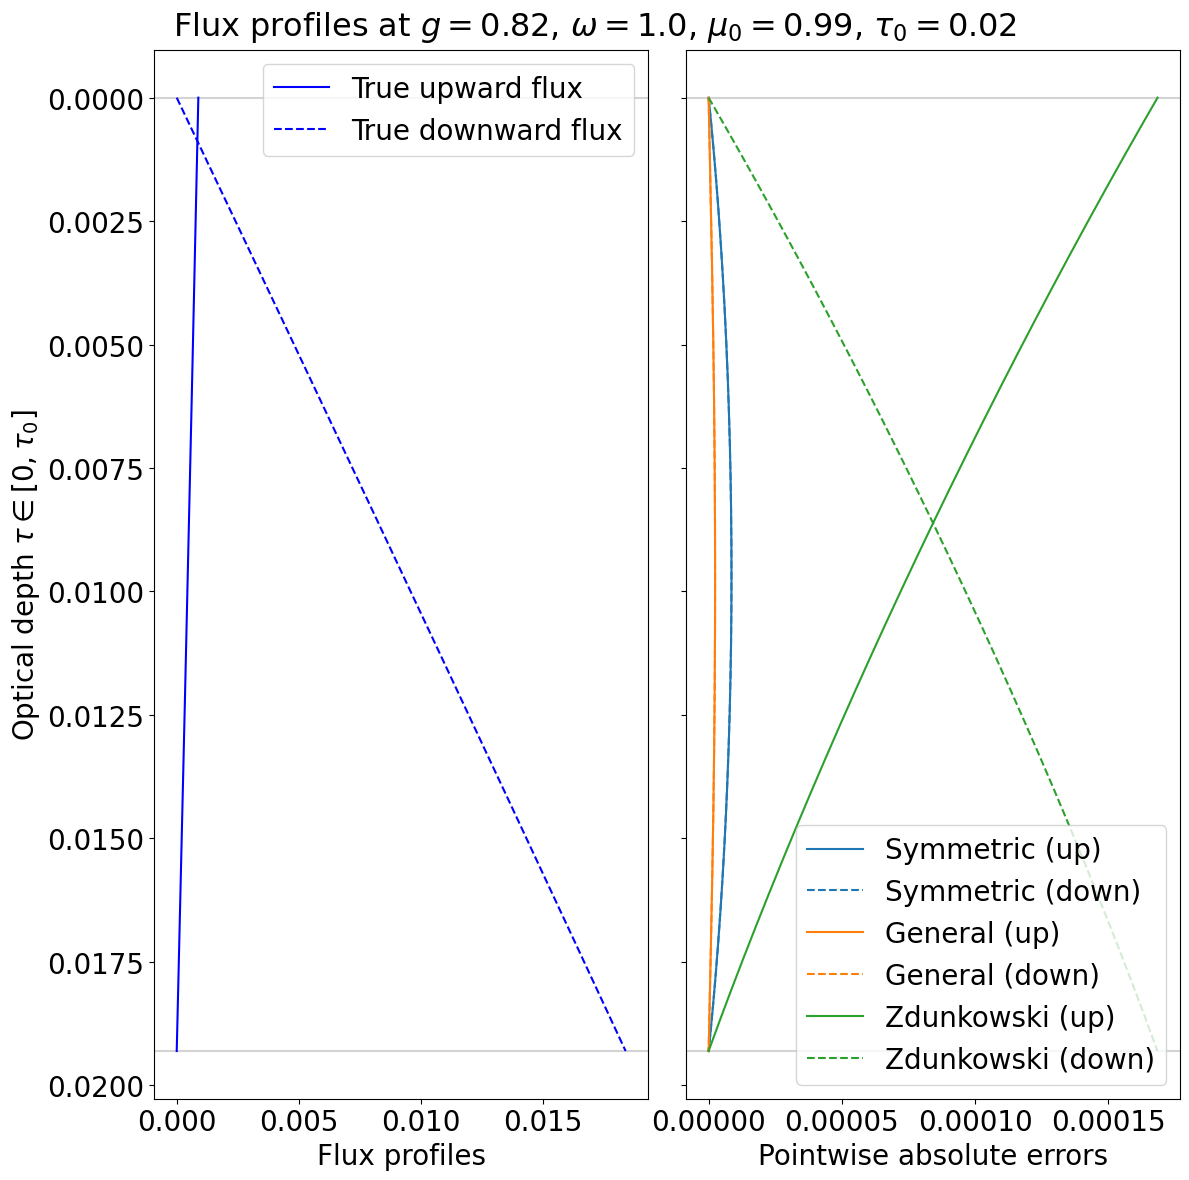

In [36]:
# Plots of flux profiles and errors (Fig. 4)
fig = plt.figure(figsize=(12, 12))
plt.suptitle(
    "Flux profiles at"
    + " $g =$"
    + str(np.round(g, 2))
    + r", $\omega =$"
    + str(np.round(omega, 2))
    + r", $\mu_0 =$"
    + str(np.round(mu0, 2))
    + r", $\tau_0 =$"
    + str(np.round(tau0, 2)),
    fontsize=23,
)

ax1 = plt.subplot(121)
plt.axhline(tau0, color="lightgrey")
plt.axhline(0, color="lightgrey")
plt.plot(flux_up(tau_arr), tau_arr, color="blue", label="True upward flux")
plt.plot(flux_down(tau_arr)[0], tau_arr, '--', color="blue", label="True downward flux")
plt.yticks(fontsize=20)
plt.ylabel(r"Optical depth $\tau \in [0, \tau_0]$", fontsize=20)
plt.xlabel(r"Flux profiles", fontsize=20)
plt.locator_params(axis='x', nbins=6)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.gca().invert_yaxis()
plt.legend(fontsize=20)

ax2 = plt.subplot(122)
ax2.tick_params(labelleft=False)
plt.axhline(tau0, color="lightgrey")
plt.axhline(0, color="lightgrey")
plt.plot(Fp2_abs_err, tau_arr, color=colors[0], label="Symmetric (up)")
plt.plot(Fm2_abs_err, tau_arr, "--", color=colors[0], label="Symmetric (down)")
plt.plot(Fp4_abs_err, tau_arr, color=colors[1], label="General (up)")
plt.plot(Fm4_abs_err, tau_arr, "--", color=colors[1], label="General (down)")
plt.plot(Fp_Zdun_abs_err, tau_arr, color=colors[2], label="Zdunkowski (up)")
plt.plot(Fm_Zdun_abs_err, tau_arr, "--", color=colors[2], label="Zdunkowski (down)")
plt.locator_params(axis='x', nbins=6)
plt.yticks(fontsize=20)
plt.xlabel(r"Pointwise absolute errors", fontsize=20)
plt.xticks(fontsize=20)
plt.gca().invert_yaxis()
plt.legend(fontsize=20)

#plt.legend(fontsize=20)
fig.tight_layout(w_pad=0)

# Contour and 3D plots of dataset

In [37]:
eff_radius = np.linspace(4, 20, 6)

# Create meshgrids
T, M = np.meshgrid(np.log10(tau0_data), mu0_data)
G, O = np.meshgrid(g_data, omega_data)
R, O_cloud = np.meshgrid(eff_radius, omega_data)

## Figure 6

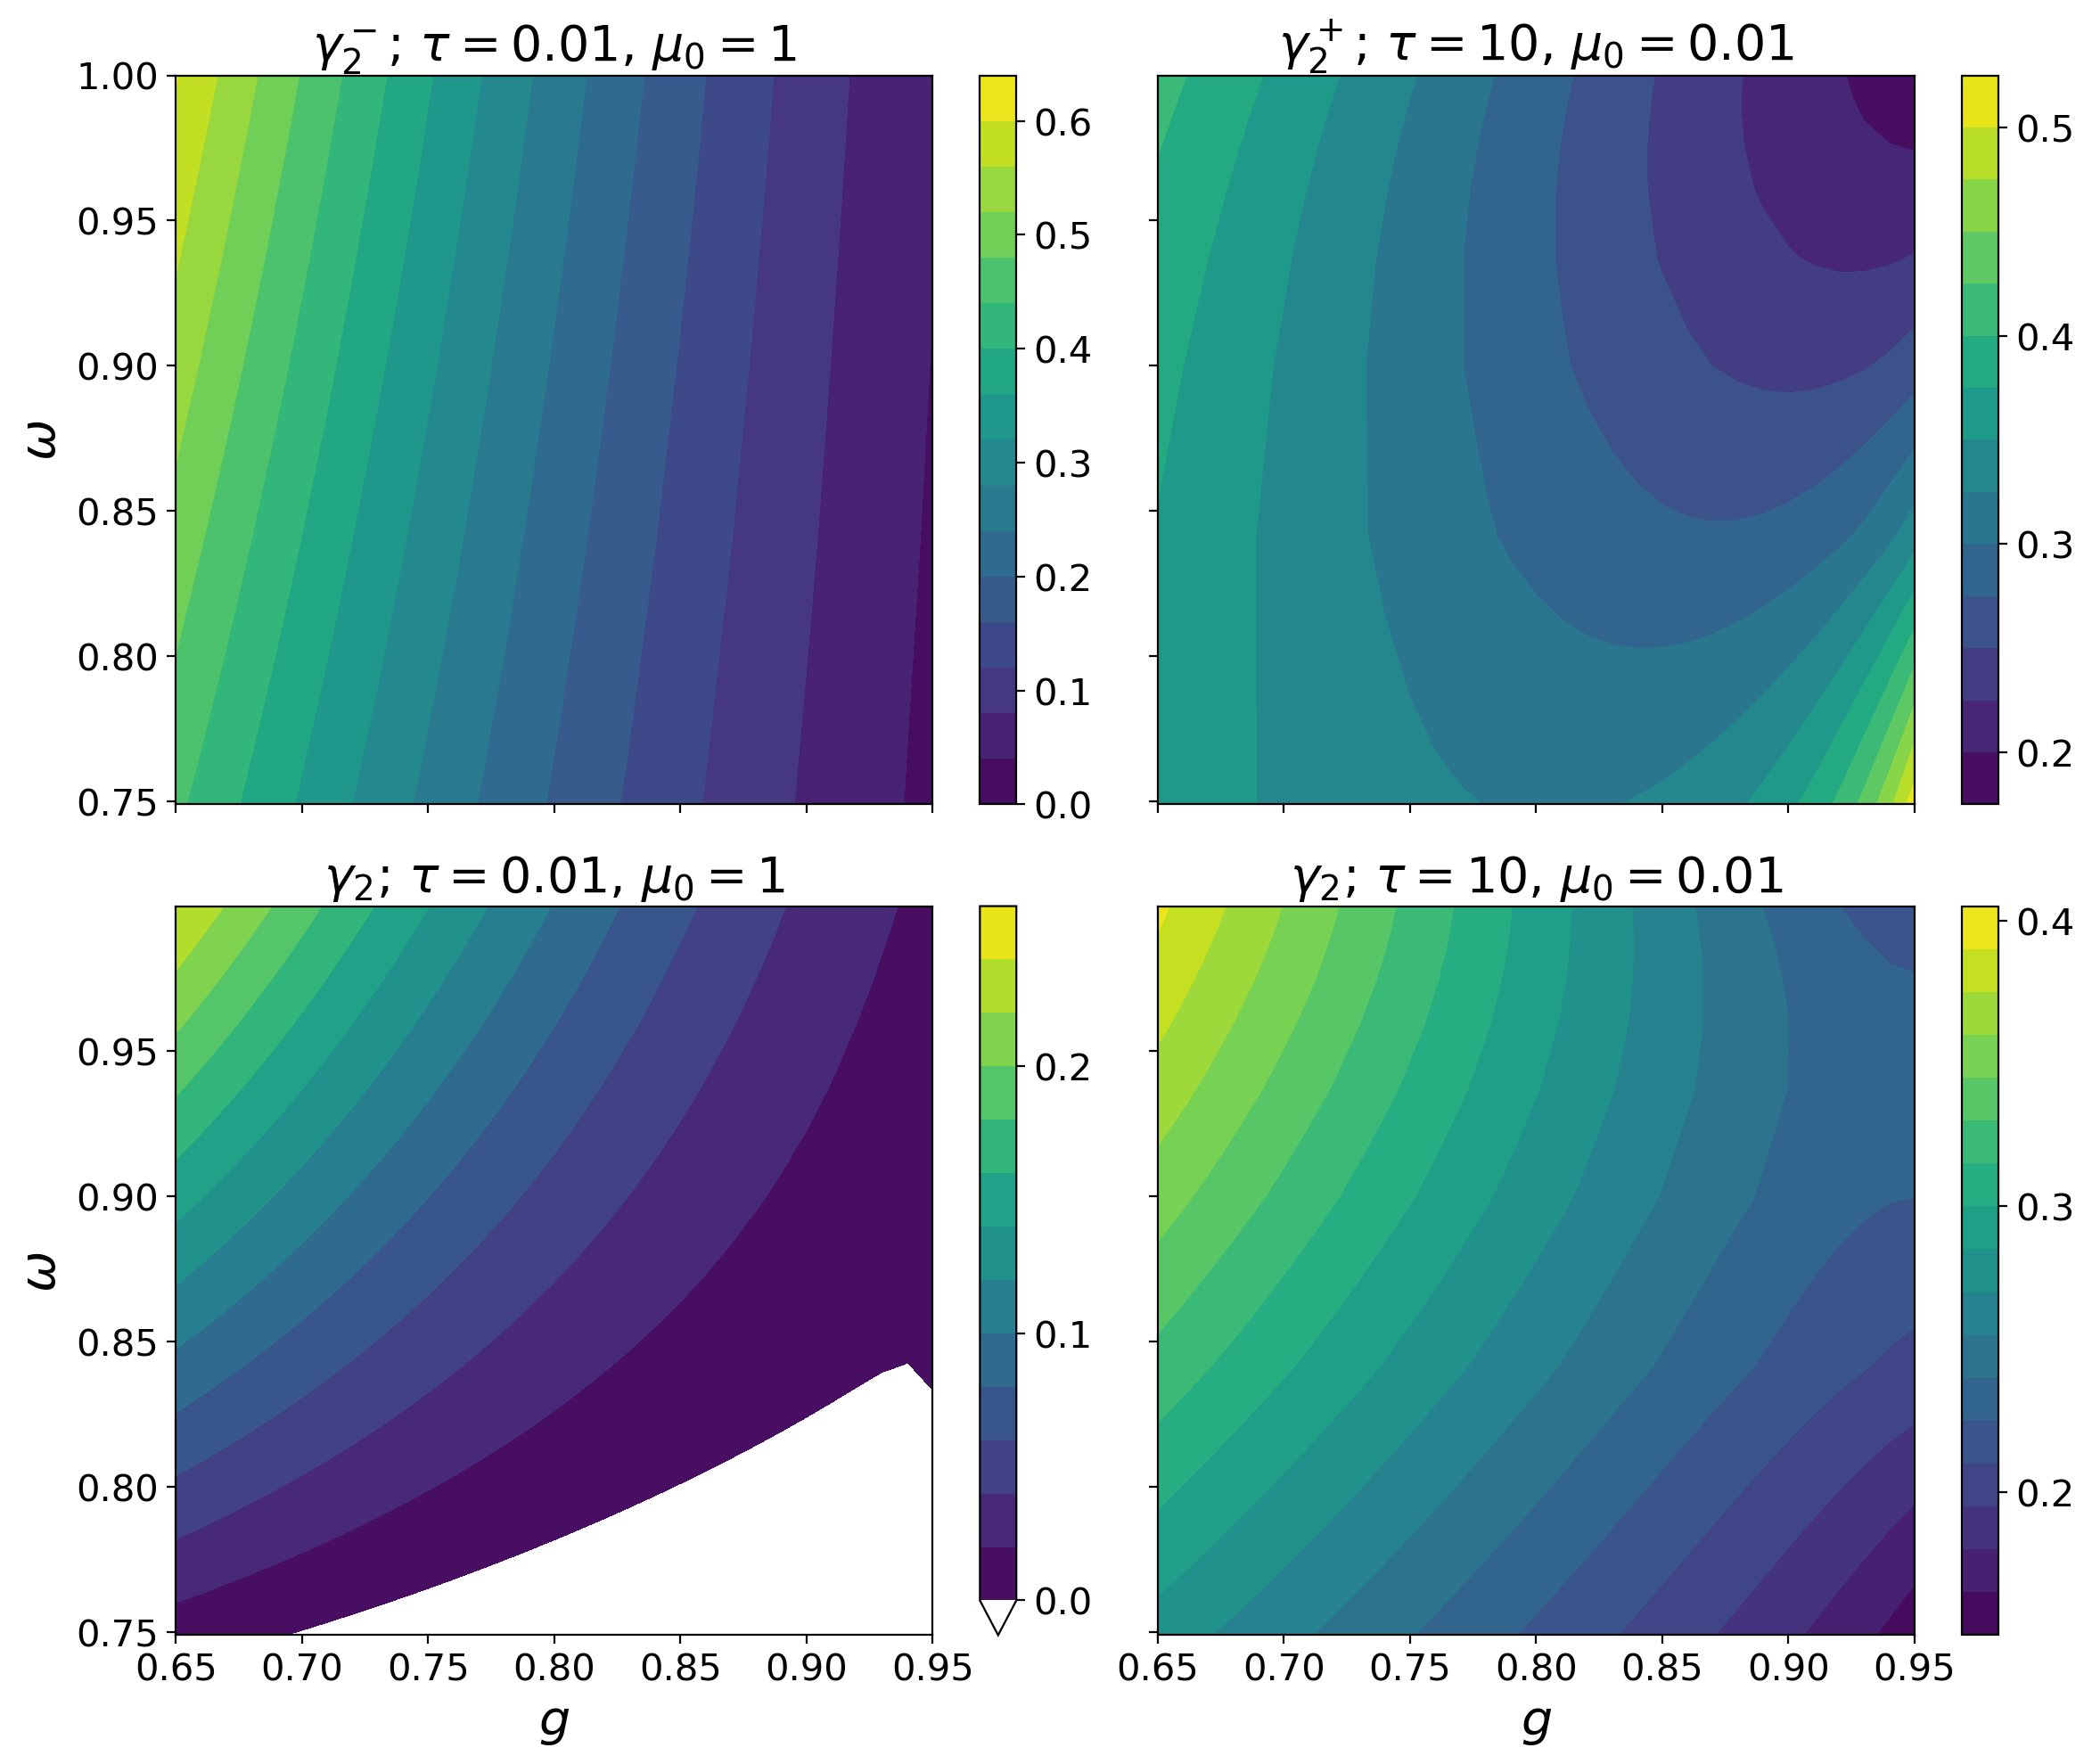

In [38]:
# Variation against single-scattering parameters: g, omega (Fig. 6)
fig = plt.figure(figsize=(12, 10), dpi=200)
ax1 = plt.subplot((221))
ax1.tick_params(labelbottom=False)
CS = plt.contourf(
    G,
    O,
    gamma2m_opt_data[:, -1, :, 0].T,
    levels=15,
)
plt.title(r"$\gamma_2^-$; $\tau = 0.01$, $\mu_0 = 1$", fontsize=20)
plt.ylabel(r"$\omega$", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(np.linspace(0.75, 1, 6), fontsize=15)
cbar = fig.colorbar(CS)
cbar.ax.tick_params(labelsize=15)
cbar.ax.set_yticks(np.linspace(0, 0.6, 7))

ax2 = plt.subplot((222))
ax2.tick_params(labelleft=False)
ax2.tick_params(labelbottom=False)
CS2 = plt.contourf(
    G,
    O,
    gamma2p_opt_data[:, 0, :, -1].T,
    levels=15,
)
plt.title(r"$\gamma_2^+$; $\tau = 10$, $\mu_0 = 0.01$", fontsize=20)
cbar2 = fig.colorbar(CS2)
cbar2.ax.tick_params(labelsize=15)
cbar2.ax.set_yticks(np.linspace(0.2, 0.5, 4))

#####

ax3 = plt.subplot((223))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
CS3 = plt.contourf(
    G, 
    O, 
    gamma2_opt_data[:, -1, :, 0].T,
    levels=15,
    extend="min"
)
plt.title(r"$\gamma_2$; $\tau = 0.01$, $\mu_0 = 1$", fontsize=20)
plt.xlabel(r"$g$", fontsize=20)
plt.ylabel(r"$\omega$", fontsize=20)
CS3.cmap.set_under("white")
cbar3 = fig.colorbar(CS3)
cbar3.ax.tick_params(labelsize=15)
cbar3.ax.set_yticks(np.linspace(0, 0.2, 3))

ax4 = plt.subplot((224))
ax4.tick_params(labelleft=False)
CS4 = plt.contourf(
    G, 
    O, 
    gamma2_opt_data[:, 0, :, -1].T,
    levels=15,
)
plt.title(r"$\gamma_2$; $\tau = 10$, $\mu_0 = 0.01$", fontsize=20)
plt.xlabel(r"$g$", fontsize=20)
plt.xticks(fontsize=15)
CS4.cmap.set_under("white")
cbar4 = fig.colorbar(CS4)
cbar4.ax.tick_params(labelsize=15)
cbar4.ax.set_yticks(np.linspace(0.2, 0.4, 3))

fig.tight_layout(w_pad=0)

### Figure 6 but as an INTERACTIVE 3D plot

In [39]:
# Choose which optimized coupling coefficient to plot out of
'''
General:   gamma1p_opt_data, gamma1m_opt_data, gamma2p_opt_data, gamma2m_opt_data,
Symmetric: gamma1_opt_data, gamma2_opt_data
'''

plot_go = gamma1p_opt_data

*WARNING: this plot is computationally intensive and may not load. Clearing all outputs before running this code block should help.*

In [40]:
# INTERACTIVE 3D plot of the variation against single-scattering parameters: g, omega (Fig. 6)
'''Nt, Nm = len(tau0_data), len(mu0_data)

layout = go.Layout(
    scene=dict(
        zaxis=dict(title="Coefficient value"),
        xaxis=dict(title="Single-scattering albedo"),
        yaxis=dict(title="Asymmetry parameter"),
        aspectratio=dict(x=1.5, y=1.5, z=1),
    ),
    font=dict(size=15)
)
fig = go.Figure(layout=layout)

# Add traces, one for each slider step
for step in range(Nt):
    fig.add_trace(
        go.Surface(
            visible=False,
            x=omega_data,
            y=g_data,
            z=plot_go[:, step, :, 0],
            hovertemplate=("omega: %{x:.3f}<br>g: %{y:.3f}<br><b>gamma: %{z:.3f}<b>"),
        )
    )

# Make 0th trace visible
fig.data[0].visible = True

# Create and add slider for tau0
steps_tau0 = []
for i in range(Nt):
    step = dict(
        method="update",
        args=[
            {"visible": [False] * Nt},
        ],
        label=str(np.around(tau0_data[i], 3)),
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps_tau0.append(step)

# Create and add slider for mu0
steps_mu0 = []
for i in range(Nm):
    plot_go_it = np.moveaxis(plot_go[:, :, :, i], 1, 0)
    step = dict(
        method="update",
        args=[
            {"z": plot_go_it},
        ],
        label=str(np.around(mu0_data[i], 3)),
    )
    steps_mu0.append(step)

sliders = [
    dict(
        active=0,
        currentvalue={"prefix": "tau0: "},
        steps=steps_tau0,
    ),
    dict(
        active=0,
        currentvalue={"prefix": "mu0: "},
        steps=steps_mu0,
        pad={"t": 100},
    ),
]

fig.update_layout(
    sliders=sliders,
    width=1000,
    height=800,
)'''

'Nt, Nm = len(tau0_data), len(mu0_data)\n\nlayout = go.Layout(\n    scene=dict(\n        zaxis=dict(title="Coefficient value"),\n        xaxis=dict(title="Single-scattering albedo"),\n        yaxis=dict(title="Asymmetry parameter"),\n        aspectratio=dict(x=1.5, y=1.5, z=1),\n    ),\n    font=dict(size=15)\n)\nfig = go.Figure(layout=layout)\n\n# Add traces, one for each slider step\nfor step in range(Nt):\n    fig.add_trace(\n        go.Surface(\n            visible=False,\n            x=omega_data,\n            y=g_data,\n            z=plot_go[:, step, :, 0],\n            hovertemplate=("omega: %{x:.3f}<br>g: %{y:.3f}<br><b>gamma: %{z:.3f}<b>"),\n        )\n    )\n\n# Make 0th trace visible\nfig.data[0].visible = True\n\n# Create and add slider for tau0\nsteps_tau0 = []\nfor i in range(Nt):\n    step = dict(\n        method="update",\n        args=[\n            {"visible": [False] * Nt},\n        ],\n        label=str(np.around(tau0_data[i], 3)),\n    )\n    step["args"][0]["visib

## Figure 7

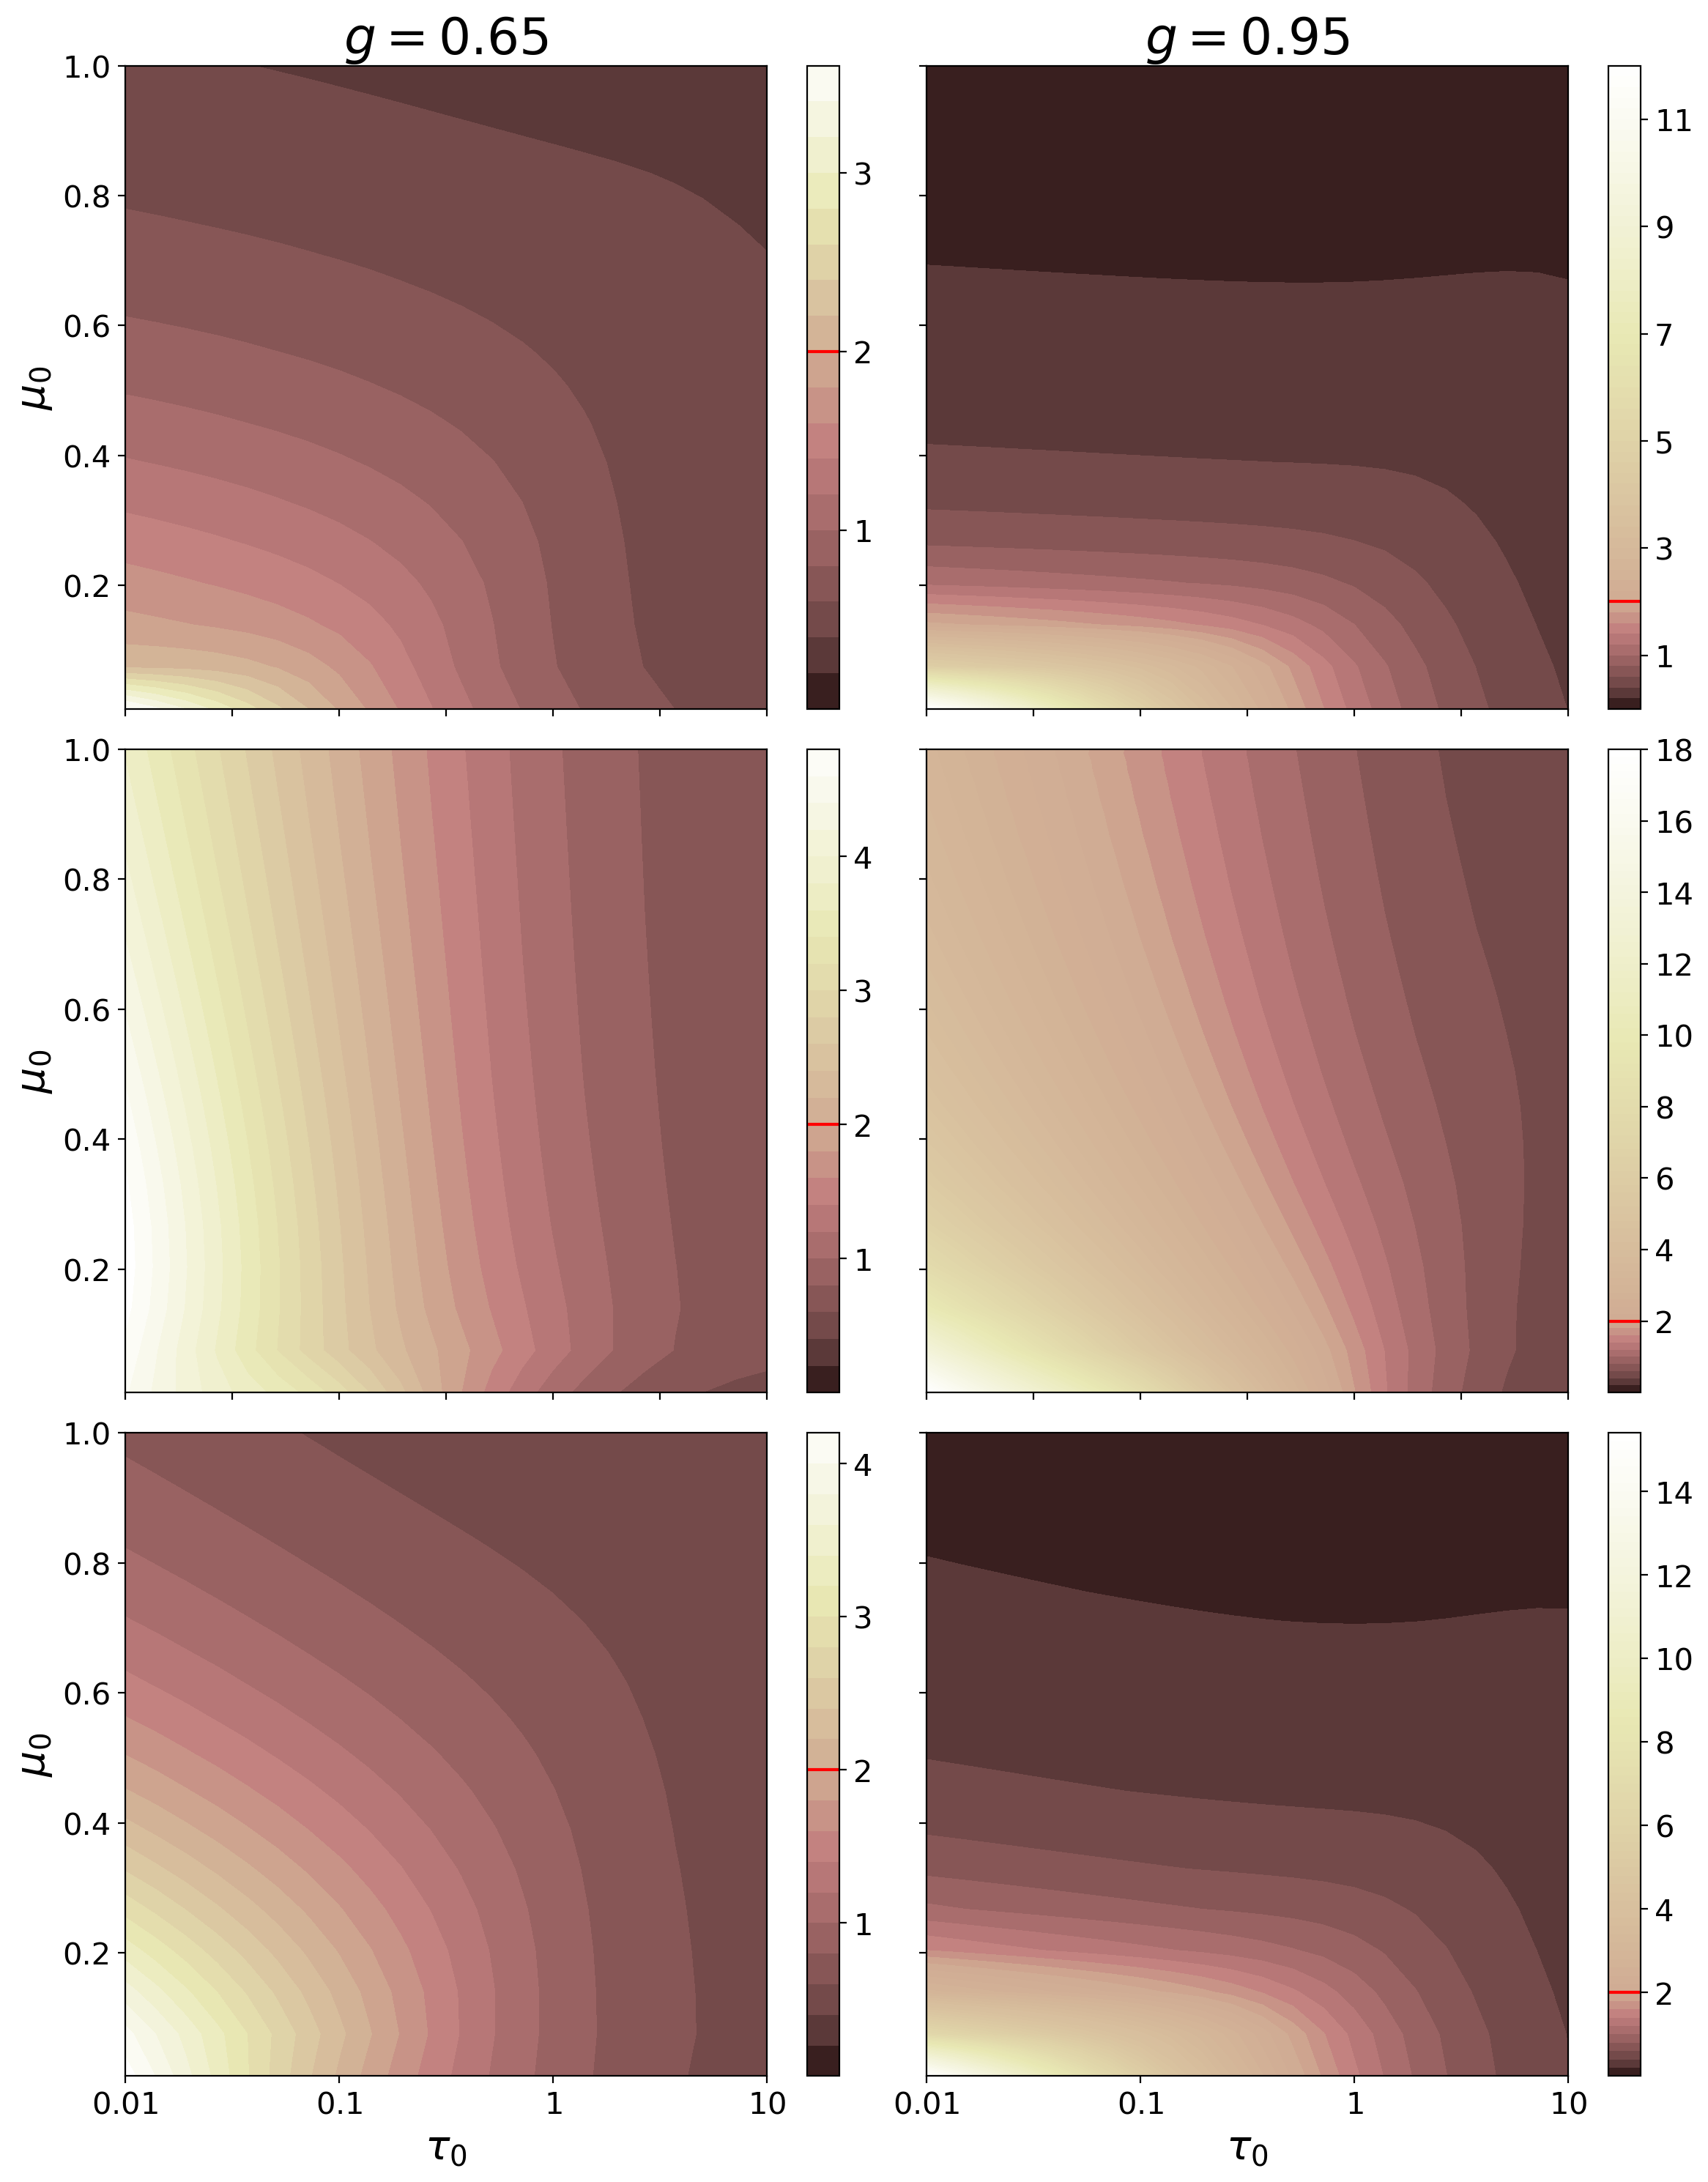

In [41]:
# Variation against macro parameters: tau0, mu0 (Fig. 7)
fig = plt.figure(figsize=(12, 15), dpi=200)
ax1 = plt.subplot((321))
ax1.tick_params(labelbottom=False)
CS = plt.contourf(
    T,
    M,
    gamma1_opt_data[0, :, -3, :].T,
    np.concatenate(
        (
            np.linspace(0, 2, 11)[:-1],
            np.arange(2, np.max(gamma1_opt_data[0, :, -3, :]), 0.2),
        )
    ),
    norm=mpl.colors.TwoSlopeNorm(
        vmin=0, vcenter=2, vmax=np.max(gamma1_opt_data[0, :, -3, :])
    ),
    cmap=mpl.colormaps["pink"],
)
plt.title(r"$g = 0.65$", fontsize=25)
plt.ylabel(r"$\mu_0$", fontsize=20)
plt.yticks(fontsize=15)
cbar = fig.colorbar(CS)
cbar.ax.tick_params(labelsize=15)
cbar.ax.set_yticks(np.linspace(1, 3, 3))
cbar.ax.axhline(2, c="r")

ax2 = plt.subplot((322))
ax2.tick_params(labelleft=False, labelbottom=False)
CS2 = plt.contourf(
    T,
    M,
    gamma1_opt_data[-1, :, -3, :].T,
    np.concatenate(
        (
            np.linspace(0, 2, 11)[:-1],
            np.arange(2, np.max(gamma1_opt_data[-1, :, -3, :]), 0.2),
        )
    ),
    norm=mpl.colors.TwoSlopeNorm(
        vmin=0, vcenter=2, vmax=np.max(gamma1_opt_data[-1, :, -3, :])
    ),
    cmap=mpl.colormaps["pink"],
)
plt.title(r"$g = 0.95$", fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
CS2.cmap.set_under("black")
cbar2 = fig.colorbar(CS2)
cbar2.ax.tick_params(labelsize=15)
cbar2.ax.set_yticks(np.linspace(1, 11, 6))
cbar2.ax.axhline(2, c="r")

#####

ax3 = plt.subplot((323))
ax3.tick_params(labelbottom=False)
CS3 = plt.contourf(
    T,
    M,
    gamma1p_opt_data[0, :, -3, :].T,
    np.concatenate(
        (
            np.linspace(0, 2, 11)[:-1],
            np.arange(2, np.max(gamma1p_opt_data[0, :, -3, :]), 0.2),
        )
    ),
    norm=mpl.colors.TwoSlopeNorm(
        vmin=0, vcenter=2, vmax=np.max(gamma1p_opt_data[0, :, -3, :])
    ),
    cmap=mpl.colormaps["pink"],
)
plt.ylabel(r"$\mu_0$", fontsize=20)
plt.yticks(fontsize=15)
cbar3 = fig.colorbar(CS3)
cbar3.ax.tick_params(labelsize=15)
cbar3.ax.set_yticks(np.linspace(1, 4, 4))
cbar3.ax.axhline(2, c="r")

ax4 = plt.subplot((324))
ax4.tick_params(labelleft=False, labelbottom=False)
CS4 = plt.contourf(
    T,
    M,
    gamma1p_opt_data[-1, :, -3, :].T,
    np.concatenate(
        (
            np.linspace(0, 2, 11)[:-1],
            np.arange(2, np.max(gamma1p_opt_data[-1, :, -3, :]), 0.2),
        )
    ),
    norm=mpl.colors.TwoSlopeNorm(
        vmin=0, vcenter=2, vmax=np.max(gamma1p_opt_data[-1, :, -3, :])
    ),
    cmap=mpl.colormaps["pink"],
)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
CS4.cmap.set_under("black")
cbar4 = fig.colorbar(CS4)
cbar4.ax.tick_params(labelsize=15)
cbar4.ax.set_yticks(np.linspace(2, 18, 9))
cbar4.ax.axhline(2, c="r")

#####

ax5 = plt.subplot((325))
CS5 = plt.contourf(
    T,
    M,
    gamma1m_opt_data[0, :, -3, :].T,
    np.concatenate(
        (
            np.linspace(0, 2, 11)[:-1],
            np.arange(2, np.max(gamma1m_opt_data[0, :, -3, :]), 0.2),
        )
    ),
    norm=mpl.colors.TwoSlopeNorm(
        vmin=0, vcenter=2, vmax=np.max(gamma1m_opt_data[0, :, -3, :])
    ),
    cmap=mpl.colormaps["pink"],
)
plt.xlabel(r"$\tau_0$", fontsize=20)
plt.ylabel(r"$\mu_0$", fontsize=20)
plt.xticks(
    np.arange(-2, 2, 1),
    labels=[r"$0.01$", r"$0.1$", r"$1$", r"$10$"],
    fontsize=15,
)
plt.yticks(fontsize=15)
cbar5 = fig.colorbar(CS5)
cbar5.ax.tick_params(labelsize=15)
cbar5.ax.set_yticks(np.linspace(1, 4, 4))
cbar5.ax.axhline(2, c="r")

ax6 = plt.subplot((326))
ax6.tick_params(labelleft=False)
CS6 = plt.contourf(
    T,
    M,
    gamma1m_opt_data[-1, :, -3, :].T,
    np.concatenate(
        (
            np.linspace(0, 2, 11)[:-1],
            np.arange(2, np.max(gamma1m_opt_data[-1, :, -3, :]), 0.2),
        )
    ),
    norm=mpl.colors.TwoSlopeNorm(
        vmin=0, vcenter=2, vmax=np.max(gamma1m_opt_data[-1, :, -3, :])
    ),
    cmap=mpl.colormaps["pink"],
)
plt.xlabel(r"$\tau_0$", fontsize=20)
plt.xticks(
    np.arange(-2, 2, 1),
    labels=[r"$0.01$", r"$0.1$", r"$1$", r"$10$"],
    fontsize=15,
)
plt.yticks(fontsize=15)
CS6.cmap.set_under("black")
cbar6 = fig.colorbar(CS6)
cbar6.ax.tick_params(labelsize=15)
cbar6.ax.set_yticks(np.linspace(2, 14, 7))
cbar6.ax.axhline(2, c="r")

fig.tight_layout(w_pad=0)

### Figure 7 but as an INTERACTIVE 3D plot

In [42]:
# Choose which optimized coupling coefficient to plot out of
'''
General:   gamma1p_opt_data, gamma1m_opt_data, gamma2p_opt_data, gamma2m_opt_data,
Symmetric: gamma1_opt_data, gamma2_opt_data
'''

plot_tm = gamma1p_opt_data

*WARNING: this plot is computationally intensive and may not load. Clearing all outputs before running this code block should help.*

In [43]:
# INTERACTIVE 3D plot of the variation against macro parameters: tau0, mu0 (Fig. 7)
'''Ng, No = len(g_data), len(omega_data)

layout = go.Layout(
    scene=dict(
        zaxis=dict(title="Coefficient value"),
        xaxis=dict(title="Cosine of solar zenith angle"),
        yaxis=dict(title="Total optical depth"),
        aspectratio=dict(x=1.5, y=1.5, z=1),
    ),
    font=dict(size=15)
)
fig = go.Figure(layout=layout)

# Add traces, one for each slider step
for step in range(Ng):
    fig.add_trace(
        go.Surface(
            visible=False,
            x=mu0_data,
            y=tau0_data,
            z=plot_tm[step, :, 0, :],
            hovertemplate=("mu0: %{x:.3f}<br>tau0: %{y:.3f}<br><b>gamma: %{z:.3f}<b>"),
        )
    )

# Make 0th trace visible
fig.data[0].visible = True

# Create and add slider for g
steps_g = []
for i in range(Ng):
    step = dict(
        method="update",
        args=[
            {"visible": [False] * Ng},
        ],
        label=str(np.around(g_data[i], 3)),
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps_g.append(step)

# Create and add slider for omega
steps_omega = []
for i in range(No):
    plot_tm_io = plot_tm[:, :, i, :]
    step = dict(
        method="update",
        args=[
            {"z": plot_tm_io},
        ],
        label=str(np.around(omega_data[i], 6)),
    )
    steps_omega.append(step)

sliders = [
    dict(
        active=0,
        currentvalue={"prefix": "g: "},
        steps=steps_g,
    ),
    dict(
        active=0,
        currentvalue={"prefix": "omega: "},
        steps=steps_omega,
        pad={"t": 100},
    ),
]

fig.update_layout(
    sliders=sliders,
    width=1000,
    height=800,
)'''

'Ng, No = len(g_data), len(omega_data)\n\nlayout = go.Layout(\n    scene=dict(\n        zaxis=dict(title="Coefficient value"),\n        xaxis=dict(title="Cosine of solar zenith angle"),\n        yaxis=dict(title="Total optical depth"),\n        aspectratio=dict(x=1.5, y=1.5, z=1),\n    ),\n    font=dict(size=15)\n)\nfig = go.Figure(layout=layout)\n\n# Add traces, one for each slider step\nfor step in range(Ng):\n    fig.add_trace(\n        go.Surface(\n            visible=False,\n            x=mu0_data,\n            y=tau0_data,\n            z=plot_tm[step, :, 0, :],\n            hovertemplate=("mu0: %{x:.3f}<br>tau0: %{y:.3f}<br><b>gamma: %{z:.3f}<b>"),\n        )\n    )\n\n# Make 0th trace visible\nfig.data[0].visible = True\n\n# Create and add slider for g\nsteps_g = []\nfor i in range(Ng):\n    step = dict(\n        method="update",\n        args=[\n            {"visible": [False] * Ng},\n        ],\n        label=str(np.around(g_data[i], 3)),\n    )\n    step["args"][0]["visible"]

# Diffusion Approximation

Plotting the diffusion approximation requires data that is not normally provided by PythonicDISORT, or its FORTRAN antecedent DISORT, but can be extracted from them. Here, we provide the necessary data to plot Fig. 8.

In [44]:
# Data to plot Fig. 8
omega = 0.7488113568490418
mu_arr_pos, weights_mu = PythonicDISORT.subroutines.Gauss_Legendre_quad(53)
S_cache_fig7 = S(0.65 ** np.arange(250))(mu_arr_pos)
tau_arr1 = np.linspace(0, 1, 200)
tau_arr10 = np.linspace(0, 10, 200)

a_s_plus = np.array([1.69245647e-04, 1.68715521e-04, 1.67768912e-04, 1.66417630e-04,
       1.64678579e-04, 1.62573149e-04, 1.60126647e-04, 1.57367662e-04,
       1.54327382e-04, 1.51038883e-04, 1.47536412e-04, 1.43854704e-04,
       1.40028335e-04, 1.36091143e-04, 1.32075713e-04, 1.28012955e-04,
       1.23931759e-04, 1.19858741e-04, 1.15818067e-04, 1.11831354e-04,
       1.07917643e-04, 1.04093425e-04, 1.00372721e-04, 9.67672023e-05,
       9.32863341e-05, 8.99375508e-05, 8.67264375e-05, 8.36569212e-05,
       8.07314630e-05, 7.79512467e-05, 7.53163595e-05, 7.28259644e-05,
       7.04784590e-05, 6.82716227e-05, 6.62027500e-05, 6.42687700e-05,
       6.24663528e-05, 6.07920030e-05, 5.92421411e-05, 5.78131746e-05,
       5.65015575e-05, 5.53038421e-05, 5.42167220e-05, 5.32370680e-05,
       5.23619577e-05, 5.15887005e-05, 5.09148564e-05, 5.03382525e-05,
       4.98569957e-05, 4.94694815e-05, 4.91744018e-05, 4.89707469e-05,
       4.88577740e-05])
a_s_minus = np.array([0.00016949, 0.00017003, 0.00017099, 0.00017239, 0.00017423,
       0.00017653, 0.00017929, 0.00018254, 0.0001863 , 0.00019058,
       0.00019541, 0.00020082, 0.00020684, 0.00021351, 0.00022086,
       0.00022893, 0.00023777, 0.00024742, 0.00025794, 0.00026937,
       0.00028177, 0.00029519, 0.00030969, 0.00032534, 0.00034217,
       0.00036026, 0.00037965, 0.00040038, 0.00042249, 0.00044602,
       0.00047097, 0.00049734, 0.00052512, 0.00055425, 0.00058467,
       0.00061629, 0.00064895, 0.0006825 , 0.00071672, 0.00075136,
       0.00078612, 0.00082068, 0.00085465, 0.00088764, 0.00091921,
       0.00094893, 0.00097634, 0.001001  , 0.00102249, 0.00104043,
       0.00105449, 0.00106441, 0.00106998])
gamma2m_tau1 = np.array([5.35619695, 2.96187003, 2.45582563, 2.15034992, 1.93160902,
       1.76294901, 1.62778303, 1.51690145, 1.42443169, 1.34628772,
       1.27947557, 1.22173479, 1.17132848, 1.12690712, 1.08741386,
       1.05201552, 1.02005093, 0.99099195, 0.96441359, 0.93997124,
       0.91738324, 0.89641745, 0.87688094, 0.85861206, 0.84147427,
       0.82535133, 0.8101436 , 0.79576504, 0.78214089, 0.7692058 ,
       0.75690233, 0.74517973, 0.73399295, 0.72330181, 0.71307037,
       0.70326628, 0.69386041, 0.68482638, 0.67614025, 0.66778022,
       0.65972641, 0.65196062, 0.64446615, 0.63722766, 0.630231  ,
       0.62346313, 0.61691197, 0.61056634, 0.60441584, 0.59845082,
       0.59266229, 0.58704186, 0.58158169, 0.57627446, 0.57111331,
       0.56609179, 0.56120386, 0.55644384, 0.55180639, 0.54728647,
       0.54287932, 0.53858046, 0.53438565, 0.53029088, 0.52629235,
       0.52238647, 0.51856983, 0.51483918, 0.51119144, 0.5076237 ,
       0.50413317, 0.5007172 , 0.49737326, 0.49409895, 0.49089196,
       0.48775012, 0.48467132, 0.48165355, 0.47869491, 0.47579356,
       0.47294774, 0.47015577, 0.46741604, 0.46472701, 0.46208719,
       0.45949514, 0.45694952, 0.45444899, 0.45199229, 0.44957822,
       0.44720558, 0.44487327, 0.44258019, 0.44032529, 0.43810757,
       0.43592606, 0.4337798 , 0.43166791, 0.4295895 , 0.42754373,
       0.42552978, 0.42354686, 0.42159421, 0.41967109, 0.41777679,
       0.41591061, 0.41407189, 0.41225997, 0.41047423, 0.40871406,
       0.40697887, 0.40526808, 0.40358114, 0.40191751, 0.40027666,
       0.3986581 , 0.39706131, 0.39548583, 0.39393119, 0.39239693,
       0.39088261, 0.38938781, 0.3879121 , 0.38645508, 0.38501636,
       0.38359554, 0.38219225, 0.38080613, 0.37943682, 0.37808397,
       0.37674724, 0.3754263 , 0.37412083, 0.37283051, 0.37155503,
       0.37029409, 0.3690474 , 0.36781467, 0.36659562, 0.36538996,
       0.36419744, 0.36301779, 0.36185074, 0.36069605, 0.35955346,
       0.35842274, 0.35730364, 0.35619592, 0.35509936, 0.35401374,
       0.35293882, 0.35187438, 0.35082022, 0.34977611, 0.34874185,
       0.34771724, 0.34670205, 0.34569611, 0.34469919, 0.34371111,
       0.34273167, 0.34176067, 0.34079793, 0.33984324, 0.33889642,
       0.33795728, 0.33702563, 0.33610127, 0.33518401, 0.33427367,
       0.33337005, 0.33247296, 0.3315822 , 0.33069757, 0.32981887,
       0.3289459 , 0.32807845, 0.32721629, 0.32635922, 0.325507  ,
       0.32465939, 0.32381615, 0.32297703, 0.32214173, 0.32130999,
       0.32048147, 0.31965587, 0.3188328 , 0.31801187, 0.31719265,
       0.31637463, 0.31555724, 0.31473983, 0.3139216 , 0.31310161,
       0.31227861, 0.31145099, 0.31061639, 0.30977091, 0.30890508])
gamma1p_tau1 = np.array([3.88396286, 3.67705301, 3.42115126, 3.13427685, 2.84459391,
       2.58071546, 2.36134394, 2.19175587, 2.06720485, 1.97849205,
       1.91608865, 1.87206137, 1.84050431, 1.81729195, 1.79964767,
       1.78574204, 1.77438281, 1.76479587, 1.75647764, 1.74909826,
       1.74243915, 1.73635307, 1.73073871, 1.72552454, 1.72065857,
       1.71610181, 1.71182406, 1.70780119, 1.70401345, 1.70044422,
       1.69707925, 1.69390617, 1.69091405, 1.68809317, 1.68543481,
       1.68293108, 1.68057484, 1.67835958, 1.67627935, 1.67432869,
       1.6725026 , 1.67079647, 1.66920603, 1.66772737, 1.66635686,
       1.66509113, 1.66392707, 1.6628618 , 1.66189264, 1.6610171 ,
       1.66023287, 1.65953782, 1.65892995, 1.65840741, 1.65796849,
       1.6576116 , 1.65733527, 1.65713813, 1.65701891, 1.65697647,
       1.65700971, 1.65711767, 1.65729942, 1.65755416, 1.65788112,
       1.65827963, 1.65874909, 1.65928894, 1.6598987 , 1.66057795,
       1.66132634, 1.66214356, 1.66302935, 1.66398352, 1.66500594,
       1.6660965 , 1.66725516, 1.66848194, 1.66977689, 1.67114011,
       1.67257175, 1.67407201, 1.67564115, 1.67727944, 1.67898722,
       1.68076489, 1.68261286, 1.68453162, 1.68652169, 1.68858364,
       1.6907181 , 1.69292571, 1.69520721, 1.69756336, 1.69999497,
       1.70250291, 1.7050881 , 1.70775152, 1.71049419, 1.71331721,
       1.71622171, 1.71920891, 1.72228006, 1.72543649, 1.7286796 ,
       1.73201086, 1.73543179, 1.738944  , 1.74254917, 1.74624906,
       1.75004551, 1.75394045, 1.75793589, 1.76203394, 1.76623679,
       1.77054675, 1.77496623, 1.77949774, 1.78414392, 1.78890752,
       1.79379143, 1.79879864, 1.80393232, 1.80919577, 1.81459244,
       1.82012596, 1.82580011, 1.83161886, 1.8375864 , 1.84370708,
       1.84998549, 1.85642646, 1.86303503, 1.86981653, 1.87677655,
       1.88392098, 1.891256  , 1.89878814, 1.90652429, 1.9144717 ,
       1.92263805, 1.93103142, 1.93966039, 1.94853401, 1.95766189,
       1.96705422, 1.97672179, 1.98667608, 1.9969293 , 2.00749445,
       2.01838537, 2.02961685, 2.04120467, 2.05316573, 2.06551811,
       2.07828124, 2.09147596, 2.10512471, 2.11925167, 2.13388293,
       2.14904673, 2.16477364, 2.18109688, 2.19805256, 2.21568006,
       2.23402241, 2.25312676, 2.27304489, 2.29383381, 2.31555651,
       2.33828279, 2.36209023, 2.38706537, 2.41330516, 2.44091859,
       2.47002877, 2.5007754 , 2.53331786, 2.56783894, 2.6045496 ,
       2.64369499, 2.68556198, 2.73048911, 2.77887948, 2.83121791,
       2.88809425, 2.95023538, 3.01855047, 3.09419626, 3.17867425,
       3.27398017, 3.38284311, 3.50912741, 3.65855001, 3.84006814,
       4.06887385, 4.37391514, 4.82132839, 5.62184297, 9.90387891])
gamma2m_tau10 = np.array([5.35621434, 1.279612  , 0.91769077, 0.75738014, 0.66038242,
       0.59350868, 0.54393135, 0.50540901, 0.47446868, 0.4489965 ,
       0.42761977, 0.40940218, 0.39367994, 0.37996749, 0.36790039,
       0.35719911, 0.34764521, 0.33906528, 0.33131972, 0.32429475,
       0.31789662, 0.31204733, 0.30668141, 0.30174351, 0.29718642,
       0.29296968, 0.28905838, 0.2854222 , 0.28203474, 0.27887283,
       0.2759161 , 0.27314654, 0.27054817, 0.26810677, 0.26580963,
       0.26364536, 0.26160373, 0.25967551, 0.25785236, 0.25612672,
       0.25449174, 0.25294116, 0.25146929, 0.25007091, 0.24874126,
       0.24747595, 0.24627096, 0.24512259, 0.24402741, 0.24298227,
       0.24198424, 0.24103062, 0.24011889, 0.23924673, 0.23841195,
       0.23761255, 0.23684663, 0.23611243, 0.23540832, 0.23473275,
       0.23408428, 0.23346156, 0.23286332, 0.23228838, 0.23173561,
       0.23120397, 0.23069245, 0.23020014, 0.22972614, 0.22926962,
       0.2288298 , 0.22840595, 0.22799734, 0.22760333, 0.22722328,
       0.2268566 , 0.22650271, 0.22616109, 0.22583122, 0.22551261,
       0.22520482, 0.22490739, 0.22461992, 0.224342  , 0.22407327,
       0.22381335, 0.2235619 , 0.2233186 , 0.22308313, 0.2228552 ,
       0.22263451, 0.2224208 , 0.2222138 , 0.22201327, 0.22181896,
       0.22163065, 0.22144812, 0.22127115, 0.22109954, 0.2209331 ,
       0.22077165, 0.220615  , 0.22046299, 0.22031545, 0.22017221,
       0.22003313, 0.21989807, 0.21976687, 0.2196394 , 0.21951554,
       0.21939514, 0.2192781 , 0.21916429, 0.2190536 , 0.21894592,
       0.21884113, 0.21873914, 0.21863985, 0.21854315, 0.21844896,
       0.21835717, 0.2182677 , 0.21818047, 0.21809538, 0.21801235,
       0.2179313 , 0.21785216, 0.21777483, 0.21769926, 0.21762535,
       0.21755304, 0.21748225, 0.21741291, 0.21734494, 0.21727828,
       0.21721286, 0.2171486 , 0.21708543, 0.21702328, 0.21696209,
       0.21690177, 0.21684226, 0.21678349, 0.21672537, 0.21666785,
       0.21661083, 0.21655424, 0.216498  , 0.21644203, 0.21638624,
       0.21633055, 0.21627486, 0.21621908, 0.21616312, 0.21610686,
       0.21605021, 0.21599305, 0.21593526, 0.21587672, 0.21581729,
       0.21575684, 0.21569522, 0.21563226, 0.2155678 , 0.21550166,
       0.21543365, 0.21536355, 0.21529114, 0.21521618, 0.2151384 ,
       0.21505752, 0.21497323, 0.21488518, 0.214793  , 0.21469629,
       0.21459459, 0.21448739, 0.21437415, 0.21425423, 0.21412696,
       0.21399154, 0.2138471 , 0.21369262, 0.21352697, 0.21334881,
       0.21315661, 0.21294857, 0.21272259, 0.21247611, 0.21220609,
       0.21190877, 0.21157946, 0.21121219, 0.21079914, 0.21032975,
       0.20978907, 0.20915469, 0.20838961, 0.20742185, 0.20602452])
gamma1p_tau10 = np.array([3.81640597, 1.76585781, 1.5817695 , 1.51818984, 1.47362186,
       1.43937793, 1.41180898, 1.38892625, 1.36951662, 1.35278235,
       1.33816963, 1.32527775, 1.31380726, 1.30352845, 1.29426123,
       1.28586188, 1.2782139 , 1.27122159, 1.26480547, 1.25889879,
       1.25344504, 1.24839598, 1.24371012, 1.23935157, 1.23528907,
       1.23149528, 1.22794612, 1.22462035, 1.22149911, 1.21856561,
       1.21580484, 1.21320333, 1.21074898, 1.20843086, 1.20623908,
       1.20416469, 1.20219953, 1.20033618, 1.19856786, 1.19688836,
       1.19529198, 1.19377352, 1.19232815, 1.19095145, 1.18963933,
       1.18838802, 1.187194  , 1.18605404, 1.18496514, 1.18392449,
       1.18292949, 1.18197773, 1.18106694, 1.18019502, 1.17936   ,
       1.17856005, 1.17779344, 1.17705856, 1.17635392, 1.17567808,
       1.17502974, 1.17440764, 1.17381062, 1.17323758, 1.17268749,
       1.17215938, 1.17165235, 1.17116554, 1.17069815, 1.17024942,
       1.16981865, 1.16940516, 1.16900834, 1.1686276 , 1.16826239,
       1.16791219, 1.16757653, 1.16725495, 1.16694705, 1.16665242,
       1.16637071, 1.16610159, 1.16584475, 1.1655999 , 1.1653668 ,
       1.1651452 , 1.1649349 , 1.16473572, 1.16454748, 1.16437005,
       1.16420332, 1.16404718, 1.16390155, 1.1637664 , 1.16364168,
       1.16352739, 1.16342354, 1.16333017, 1.16324734, 1.16317512,
       1.16311363, 1.163063  , 1.16302338, 1.16299495, 1.16297791,
       1.16297251, 1.162979  , 1.16299768, 1.16302887, 1.16307291,
       1.1631302 , 1.16320116, 1.16328624, 1.16338594, 1.16350079,
       1.16363136, 1.16377827, 1.16394218, 1.16412382, 1.16432393,
       1.16454333, 1.16478291, 1.16504359, 1.16532636, 1.16563229,
       1.16596252, 1.16631826, 1.16670079, 1.1671115 , 1.16755185,
       1.16802341, 1.16852784, 1.16906692, 1.16964255, 1.17025675,
       1.17091167, 1.17160961, 1.17235304, 1.17314456, 1.17398698,
       1.17488328, 1.17583666, 1.17685053, 1.17792855, 1.17907463,
       1.18029296, 1.18158803, 1.18296466, 1.18442804, 1.18598371,
       1.18763766, 1.18939634, 1.19126668, 1.19325618, 1.19537293,
       1.19762569, 1.20002393, 1.20257794, 1.20529889, 1.20819894,
       1.21129134, 1.21459056, 1.21811243, 1.22187429, 1.22589522,
       1.23019621, 1.23480042, 1.23973353, 1.245024  , 1.25070353,
       1.25680753, 1.26337569, 1.27045265, 1.27808883, 1.28634142,
       1.29527558, 1.30496595, 1.31549845, 1.32697262, 1.33950447,
       1.35323021, 1.36831101, 1.38493915, 1.40334634, 1.42381467,
       1.44669178, 1.47241197, 1.50152618, 1.53474606, 1.57301023,
       1.61758769, 1.67024603, 1.73353899, 1.81132988, 1.90982352,
       2.03982893, 2.22252384, 2.50797759, 3.06683256, 9.50617716])

In [45]:
# Compute diffusion approximations
gamma1p_DA = ((1 - omega / 2 * (1 + S_cache_fig7)) * weights_mu @ a_s_plus) / (
    mu_arr_pos * weights_mu @ a_s_plus
)
gamma1m_DA = ((1 - omega / 2 * (1 + S_cache_fig7)) * weights_mu @ a_s_minus) / (
    mu_arr_pos * weights_mu @ a_s_minus
)
gamma2p_DA = ((omega / 2) * (1 - S_cache_fig7) * weights_mu @ a_s_plus) / (
    mu_arr_pos * weights_mu @ a_s_plus
)
gamma2m_DA = ((omega / 2) * (1 - S_cache_fig7) * weights_mu @ a_s_minus) / (
    mu_arr_pos * weights_mu @ a_s_minus
)

## Figure 8

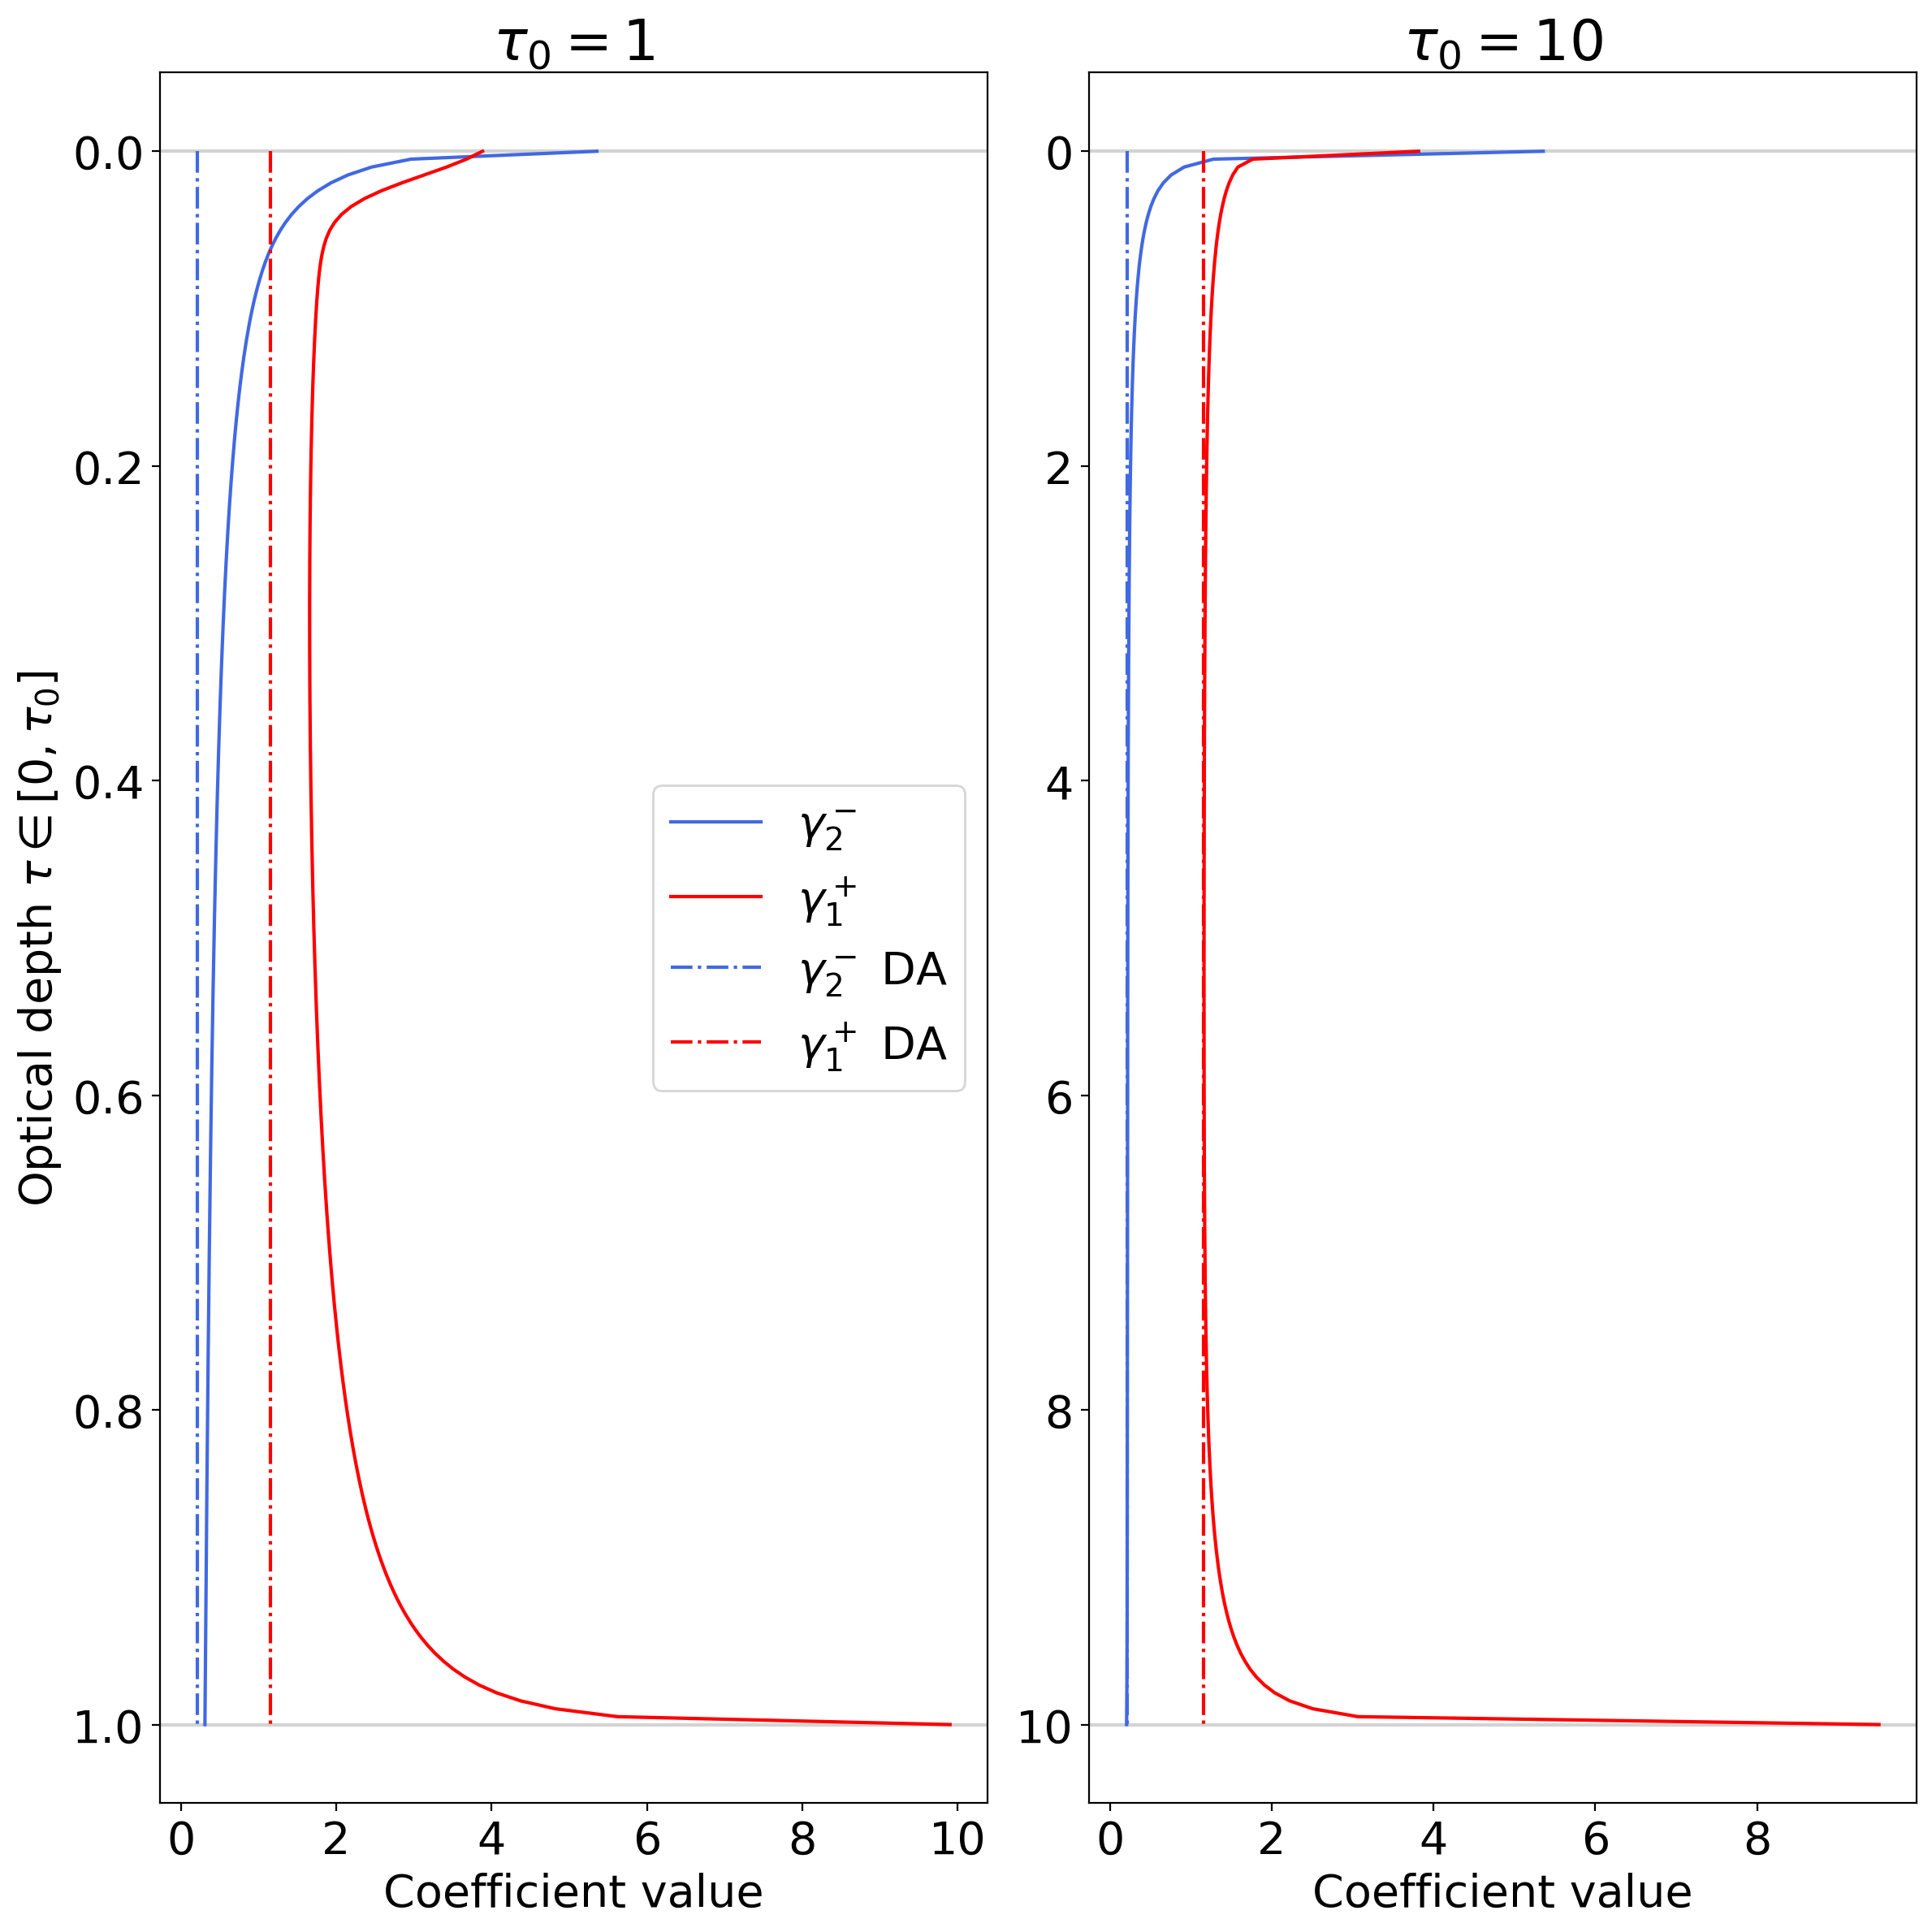

In [46]:
# Plot exact coupling coefficients with corresponding diffusion approximations (Fig. 8)
fig = plt.figure(figsize=(12, 12), dpi=200)
ax1 = plt.subplot((121))
plt.title(r"$\tau_0 = 1$", fontsize=25)
plt.gca().invert_yaxis()
plt.axhline(1, color="lightgrey")
plt.axhline(0, color="lightgrey")
plt.plot(gamma2m_tau1, tau_arr1, label="$\gamma_2^-$", color="royalblue")
plt.plot(gamma1p_tau1, tau_arr1, label="$\gamma_1^+$", color="red")
plt.plot(np.repeat(gamma2m_DA, len(tau_arr1)), tau_arr1, "-.", color="royalblue", label="$\gamma_2^-$ DA")
plt.plot(np.repeat(gamma1p_DA, len(tau_arr1)), tau_arr1, "-.", color="red", label="$\gamma_1^+$ DA")
plt.ylabel(r"Optical depth $\tau \in [0, \tau_0]$", fontsize=20)
plt.xlabel("Coefficient value", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

ax2 = plt.subplot((122))
plt.title(r"$\tau_0 = 10$", fontsize=25)
plt.gca().invert_yaxis()
plt.axhline(10, color="lightgrey")
plt.axhline(0, color="lightgrey")
plt.plot(gamma2m_tau10, tau_arr10, label="$\gamma_2^-$", color="royalblue")
plt.plot(gamma1p_tau10, tau_arr10, label="$\gamma_1^+$", color="red")
plt.plot(np.repeat(gamma2m_DA, len(tau_arr10)), tau_arr10, "-.", color="royalblue", label="$\gamma_2^-$ DA")
plt.plot(np.repeat(gamma1p_DA, len(tau_arr10)), tau_arr10, "-.", color="red", label="$\gamma_1^+$ DA")
plt.xlabel("Coefficient value", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

fig.tight_layout(h_pad=0)

## Figure 10

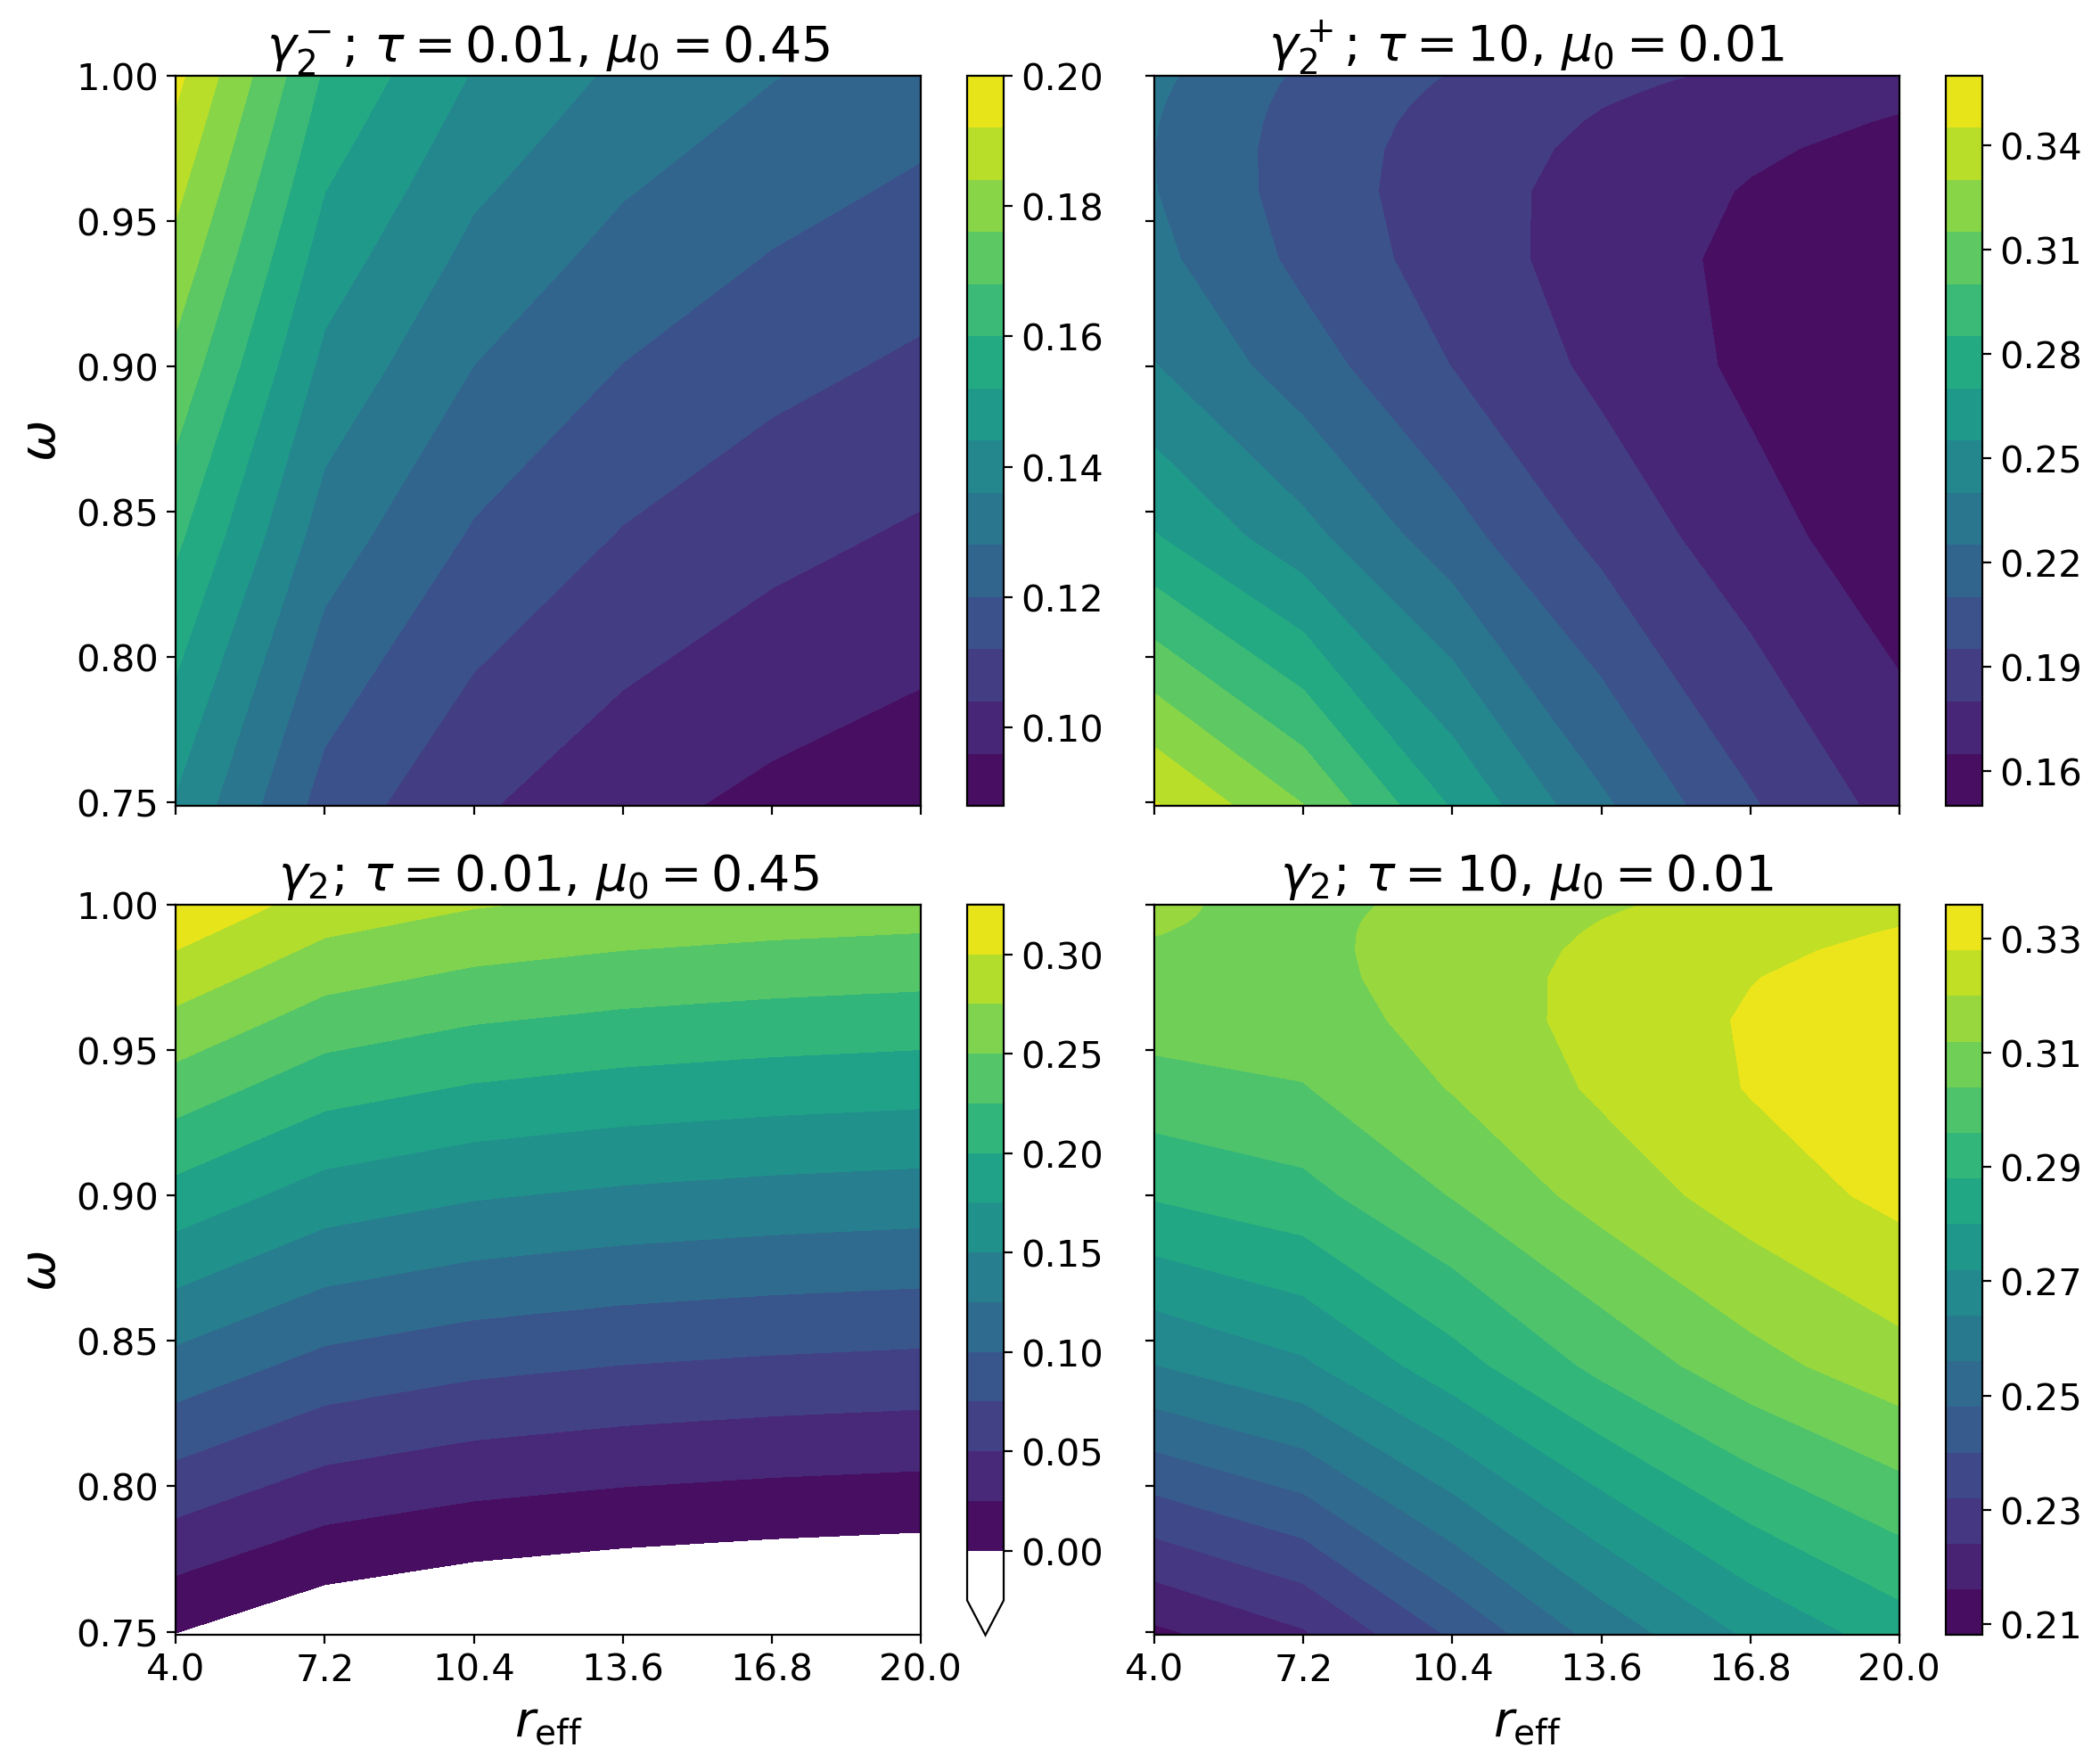

In [47]:
# Variation against single-scattering parameters: eff_radius, omega (Fig. 10)
fig = plt.figure(figsize=(12, 10), dpi=200)
ax1 = plt.subplot((221))
ax1.tick_params(labelbottom=False)
CS = plt.contourf(
    R,
    O_cloud,
    gamma2m_opt_cloudbutHGomega_data[:, -1, :, 8].T,
    levels=15,
)
plt.title(r"$\gamma_2^-$; $\tau = 0.01$, $\mu_0 = 0.45$", fontsize=20)
plt.ylabel(r"$\omega$", fontsize=20)
plt.xticks(eff_radius, fontsize=15)
plt.yticks(np.linspace(0.75, 1, 6), fontsize=15)
cbar = fig.colorbar(CS)
cbar.ax.tick_params(labelsize=15)
cbar.ax.set_yticks(np.linspace(0.2, 0.1, 6))

ax2 = plt.subplot((222))
ax2.tick_params(labelleft=False)
ax2.tick_params(labelbottom=False)
CS2 = plt.contourf(
    R,
    O_cloud,
    gamma2p_opt_cloudbutHGomega_data[:, 0, :, -1].T,
    levels=15,
)
plt.title(r"$\gamma_2^+$; $\tau = 10$, $\mu_0 = 0.01$", fontsize=20)
plt.xticks(eff_radius, fontsize=15)
plt.yticks(np.linspace(0.75, 1, 6), fontsize=15)
cbar2 = fig.colorbar(CS2)
cbar2.ax.tick_params(labelsize=15)
cbar2.ax.set_yticks(np.linspace(0.16, 0.34, 7))

#####

ax3 = plt.subplot((223))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
CS3 = plt.contourf(
    R, 
    O_cloud, 
    gamma2_opt_cloudbutHGomega_data[:, -1, :, 17].T,
    levels=15,
    vmin=0,
    extend="min"
)
plt.title(r"$\gamma_2$; $\tau = 0.01$, $\mu_0 = 0.45$", fontsize=20)
plt.xticks(eff_radius, fontsize=15)
#ax4.set_xticklabels(["0.834", "0.852", "0.860", "0.864", "0.867", "0.869"])
plt.yticks(np.linspace(0.75, 1, 6), fontsize=15)
plt.xlabel(r"$r_\text{eff}$", fontsize=20)
plt.ylabel(r"$\omega$", fontsize=20)
CS3.cmap.set_under("white")
cbar3 = fig.colorbar(CS3)
cbar3.ax.tick_params(labelsize=15)
cbar3.ax.set_yticks(np.linspace(0.3, 0, 7))

ax4 = plt.subplot((224))
ax4.tick_params(labelleft=False)
CS4 = plt.contourf(
    R, 
    O_cloud, 
    gamma2_opt_cloudbutHGomega_data[:, 0, :, -1].T,
    levels=15,
)
plt.title(r"$\gamma_2$; $\tau = 10$, $\mu_0 = 0.01$", fontsize=20)
plt.xticks(eff_radius, fontsize=15)
plt.yticks(np.linspace(0.75, 1, 6), fontsize=15)
plt.xlabel(r"$r_\text{eff}$", fontsize=20)
plt.xticks(fontsize=15)
#ax4.set_xticklabels(["0.834", "0.852", "0.860", "0.864", "0.867", "0.869"])
CS4.cmap.set_under("white")
cbar4 = fig.colorbar(CS4)
cbar4.ax.tick_params(labelsize=15)
cbar4.ax.set_yticks(np.linspace(0.33, 0.21, 7))

fig.tight_layout(w_pad=0)

### Figure 10 but as an INTERACTIVE 3D plot

In [48]:
# Choose which optimized coupling coefficient to plot out of
'''
General:   gamma1p_opt_cloudbutHGomega_data, gamma1m_opt_cloudbutHGomega_data, 
           gamma2p_opt_cloudbutHGomega_data, gamma2m_opt_cloudbutHGomega_data,
Symmetric: gamma1_opt_cloudbutHGomega_data, gamma2_opt_cloudbutHGomega_data
'''

plot_go_cloud = gamma2_opt_cloudbutHGomega_data

In [49]:
# INTERACTIVE 3D plot of the variation against single-scattering parameters: g, omega (Fig. 10)
'''Nt, Nm = len(tau0_data), len(mu0_data)

layout = go.Layout(
    scene=dict(
        zaxis=dict(title="Coefficient value"),
        xaxis=dict(title="Single-scattering albedo"),
        yaxis=dict(title="Effective radius"),
        aspectratio=dict(x=1.5, y=1.5, z=1),
    ),
    font=dict(size=15)
)
fig = go.Figure(layout=layout)

# Add traces, one for each slider step
for step in range(Nt):
    fig.add_trace(
        go.Surface(
            visible=False,
            x=omega_data,
            y=eff_radius,
            z=plot_go_cloud[:, step, :, 0],
            hovertemplate=("omega: %{x:.3f}<br>r: %{y:.3f}<br><b>gamma: %{z:.3f}<b>"),
        )
    )

# Make 0th trace visible
fig.data[0].visible = True

# Create and add slider for tau0
steps_tau0 = []
for i in range(Nt):
    step = dict(
        method="update",
        args=[
            {"visible": [False] * Nt},
        ],
        label=str(np.around(tau0_data[i], 3)),
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps_tau0.append(step)

# Create and add slider for mu0
steps_mu0 = []
for i in range(Nm):
    plot_go_cloud_it = np.moveaxis(plot_go_cloud[:, :, :, i], 1, 0)
    step = dict(
        method="update",
        args=[
            {"z": plot_go_cloud_it},
        ],
        label=str(np.around(mu0_data[i], 3)),
    )
    steps_mu0.append(step)

sliders = [
    dict(
        active=0,
        currentvalue={"prefix": "tau0: "},
        steps=steps_tau0,
    ),
    dict(
        active=0,
        currentvalue={"prefix": "mu0: "},
        steps=steps_mu0,
        pad={"t": 100},
    ),
]

fig.update_layout(
    sliders=sliders,
    width=1000,
    height=800,
)'''

'Nt, Nm = len(tau0_data), len(mu0_data)\n\nlayout = go.Layout(\n    scene=dict(\n        zaxis=dict(title="Coefficient value"),\n        xaxis=dict(title="Single-scattering albedo"),\n        yaxis=dict(title="Effective radius"),\n        aspectratio=dict(x=1.5, y=1.5, z=1),\n    ),\n    font=dict(size=15)\n)\nfig = go.Figure(layout=layout)\n\n# Add traces, one for each slider step\nfor step in range(Nt):\n    fig.add_trace(\n        go.Surface(\n            visible=False,\n            x=omega_data,\n            y=eff_radius,\n            z=plot_go_cloud[:, step, :, 0],\n            hovertemplate=("omega: %{x:.3f}<br>r: %{y:.3f}<br><b>gamma: %{z:.3f}<b>"),\n        )\n    )\n\n# Make 0th trace visible\nfig.data[0].visible = True\n\n# Create and add slider for tau0\nsteps_tau0 = []\nfor i in range(Nt):\n    step = dict(\n        method="update",\n        args=[\n            {"visible": [False] * Nt},\n        ],\n        label=str(np.around(tau0_data[i], 3)),\n    )\n    step["args"][0]